## Simple Linear Regression Sungur 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

# EDA

**CO2 Dataset**

In [2]:
co2 = pd.read_csv("co2.csv")
df = co2.copy()
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [3]:
df.sample(5)

Make                            Model            Vehicle Class  \
0         ACURA                              ILX                  COMPACT   
2444  CHEVROLET                        SILVERADO  PICKUP TRUCK - STANDARD   
7120    LINCOLN                     Nautilus AWD              SUV - SMALL   
6722  CHEVROLET  Silverado 4WD Custom Trail Boss  PICKUP TRUCK - STANDARD   
961      SUBARU                       LEGACY AWD                 MID-SIZE   

      Engine Size(L)  Cylinders Transmission Fuel Type  \
0                2.0          4          AS5         Z   
2444             5.3          8           A6         X   
7120             2.0          4          AS8         X   
6722             6.2          8          A10         Z   
961              2.5          4           M6         X   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
0                                  9.9                              6.7   
2444                              14.6                             10.4   
7120                              12.0                              9.6   
6722                              16.8                             13.3   
961                               11.3                              8.2   

      Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  \
0                                  8.5                           33   
2444                              12.7                           22   
7120                              10.7                           26   
6722                              15.2                           19   
961                                9.9                           29   

      CO2 Emissions(g/km)  
0                     196  
2444                  298  
7120                  250  
6722                  357  
961                   228

In [4]:
df.shape

(7385, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

**Columns**

In [6]:
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

In [7]:
for i in df.columns:
    print(i)

make
model
vehicle_class
engine_size
cylinders
transmission
fuel_type
fuel_cons_city
fuel_cons_hwy
fuel_cons_comb
fuel_cons_comb_mpg
co2


In [8]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

**Missing values**

In [9]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

count  percentage
make                    0         0.0
model                   0         0.0
vehicle_class           0         0.0
engine_size             0         0.0
cylinders               0         0.0
transmission            0         0.0
fuel_type               0         0.0
fuel_cons_city          0         0.0
fuel_cons_hwy           0         0.0
fuel_cons_comb          0         0.0
fuel_cons_comb_mpg      0         0.0
co2                     0         0.0

In [10]:
df.isnull().sum().sum()

0

In [11]:
import missingno as msno

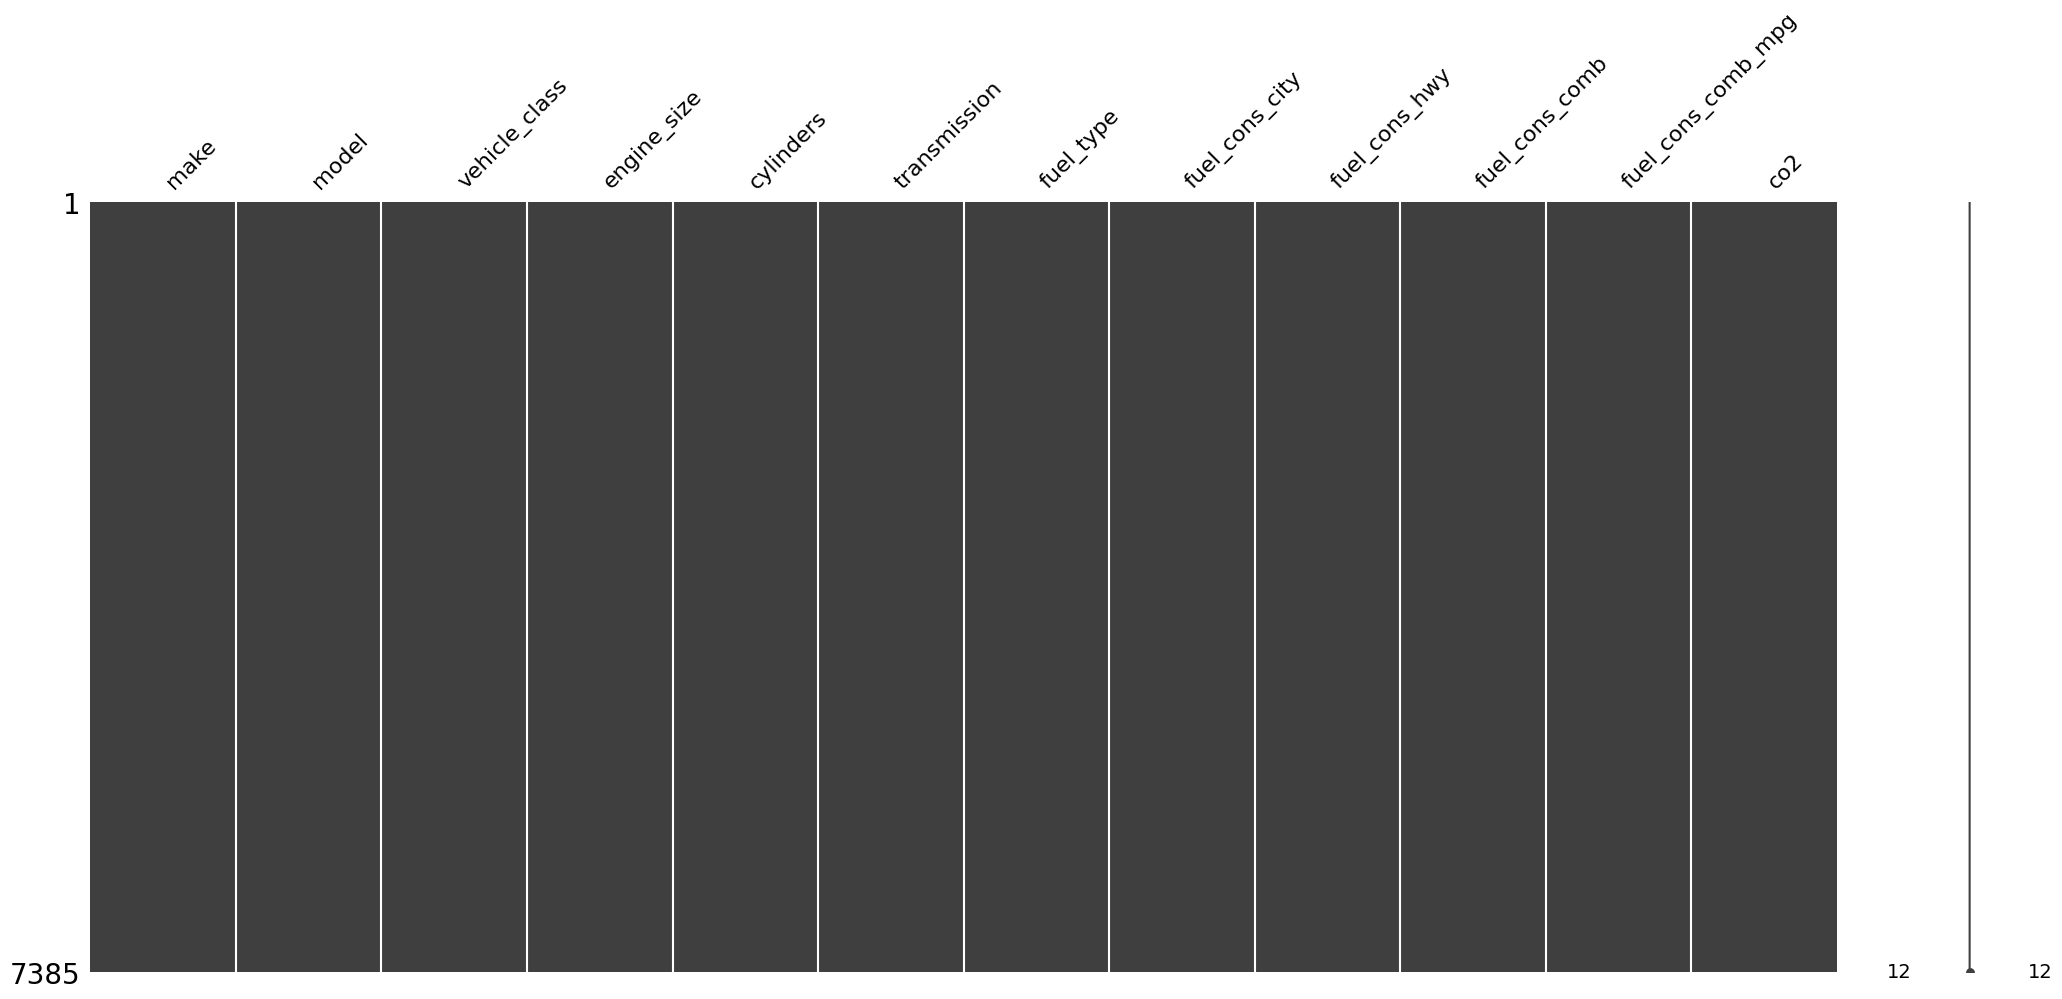

In [12]:
msno.matrix(df);

**Describtion of Dataset**

In [13]:
df.describe().T

count        mean        std   min    25%    50%    75%  \
engine_size         7385.0    3.160068   1.354170   0.9    2.0    3.0    3.7   
cylinders           7385.0    5.615030   1.828307   3.0    4.0    6.0    6.0   
fuel_cons_city      7385.0   12.556534   3.500274   4.2   10.1   12.1   14.6   
fuel_cons_hwy       7385.0    9.041706   2.224456   4.0    7.5    8.7   10.2   
fuel_cons_comb      7385.0   10.975071   2.892506   4.1    8.9   10.6   12.6   
fuel_cons_comb_mpg  7385.0   27.481652   7.231879  11.0   22.0   27.0   32.0   
co2                 7385.0  250.584699  58.512679  96.0  208.0  246.0  288.0   

                      max  
engine_size           8.4  
cylinders            16.0  
fuel_cons_city       30.6  
fuel_cons_hwy        20.6  
fuel_cons_comb       26.1  
fuel_cons_comb_mpg   69.0  
co2                 522.0

In [14]:
df.describe(include="object").T

count unique            top  freq
make           7385     42           FORD   628
model          7385   2053  F-150 FFV 4X4    32
vehicle_class  7385     16    SUV - SMALL  1217
transmission   7385     27            AS6  1324
fuel_type      7385      5              X  3637

## Make

In [15]:
df.make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

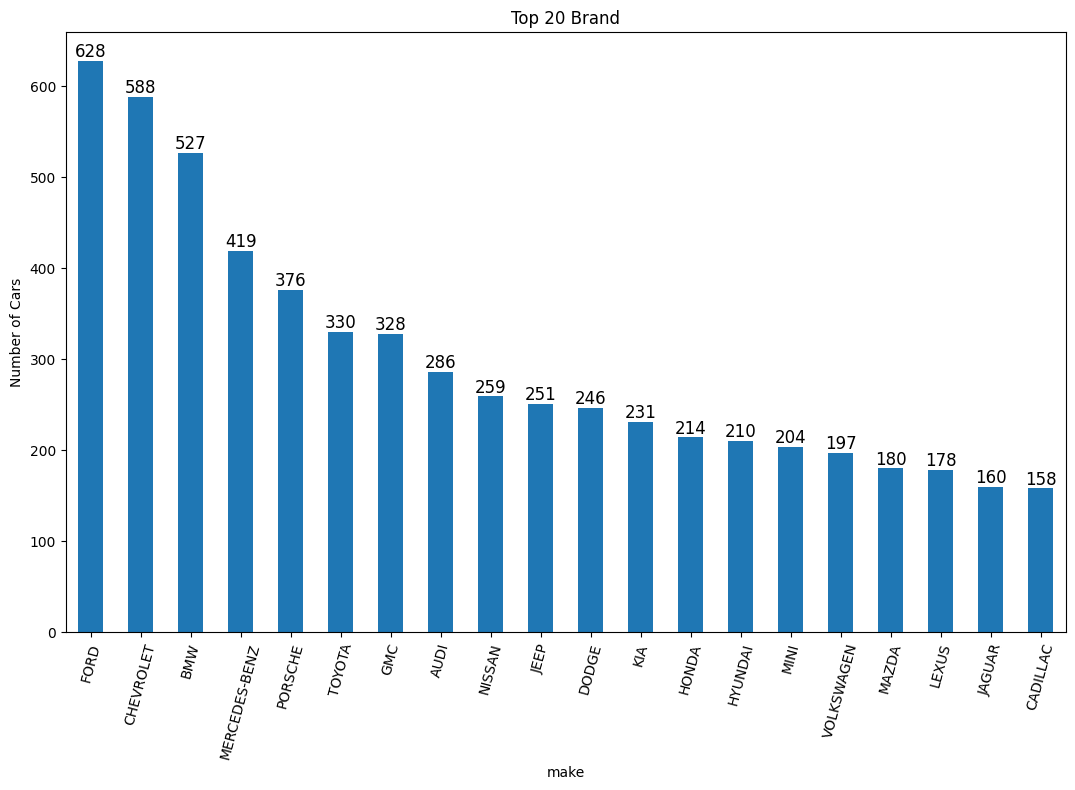

In [16]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make.value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')   
plt.xlabel('make') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 75)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

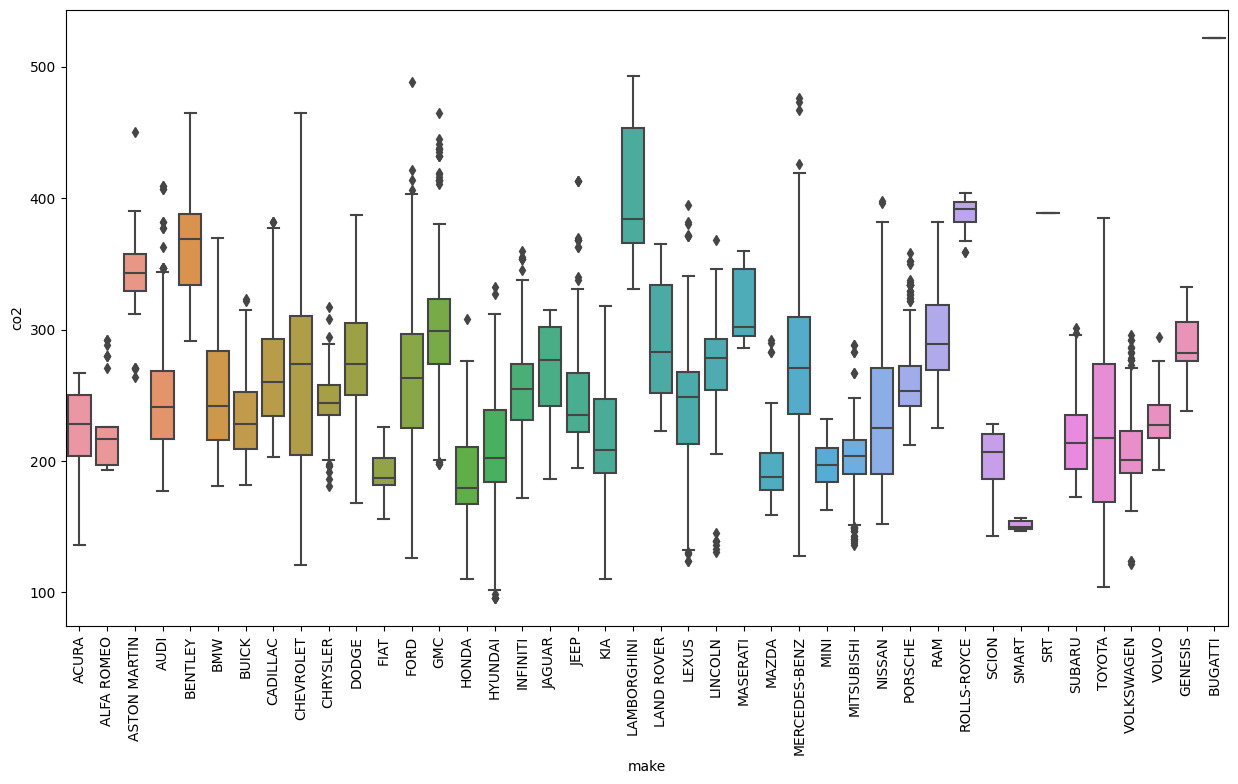

In [17]:
plt.figure(figsize = (15,8))
sns.boxplot(x="make", y="co2", data=df)
plt.xticks(rotation = 90);

## Model

In [18]:
df.model.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

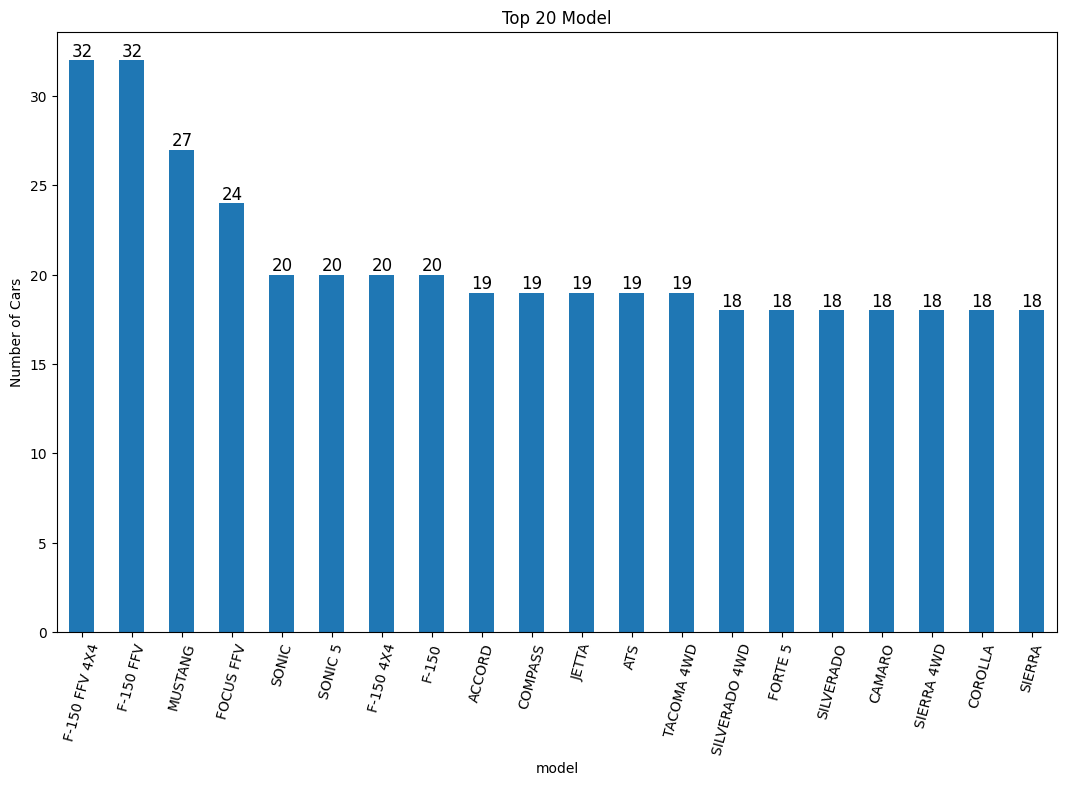

In [19]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.model.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Top 20 Model')   
plt.xlabel('model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 75)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## Vehicle Class

In [20]:
df.vehicle_class.unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

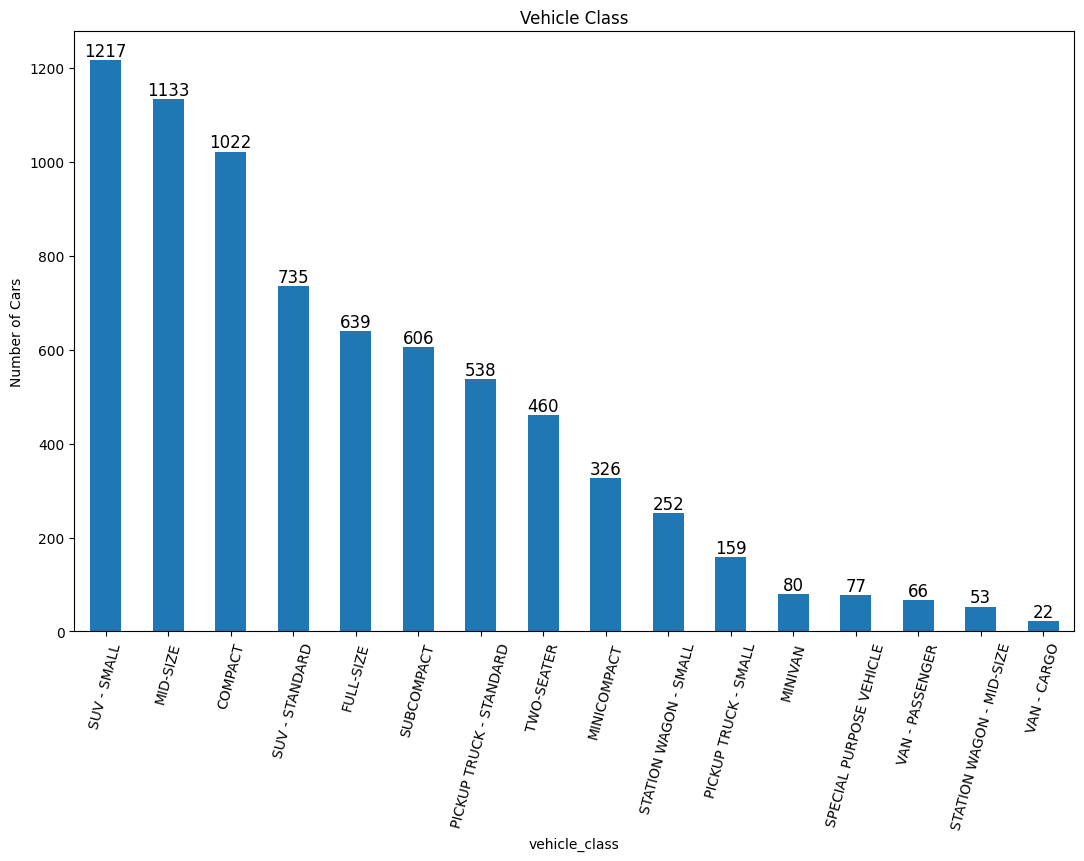

In [21]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.vehicle_class.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Vehicle Class')   
plt.xlabel('vehicle_class') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 75)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [22]:
transmission_distr = df['vehicle_class'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='vehicle_class', names='index')
fig.update_layout(title="Vehicle Class Distribution")
fig.show()

## Engine Size

In [23]:
from scipy.stats import skew

In [24]:
df.engine_size.unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

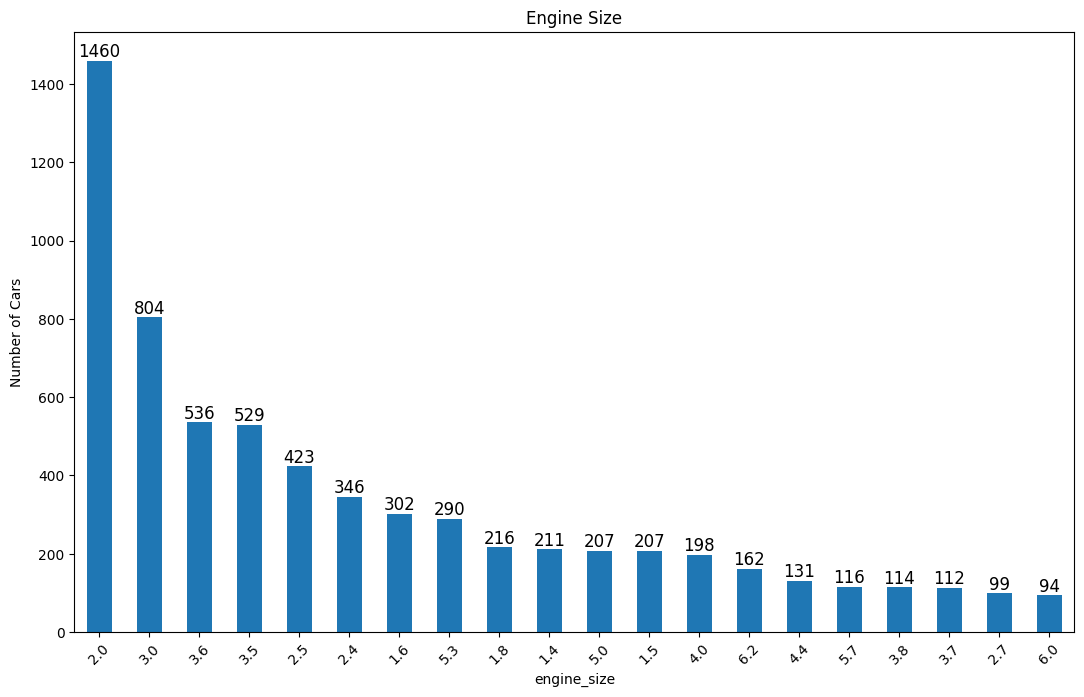

In [25]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.engine_size.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Engine Size')   
plt.xlabel('engine_size') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

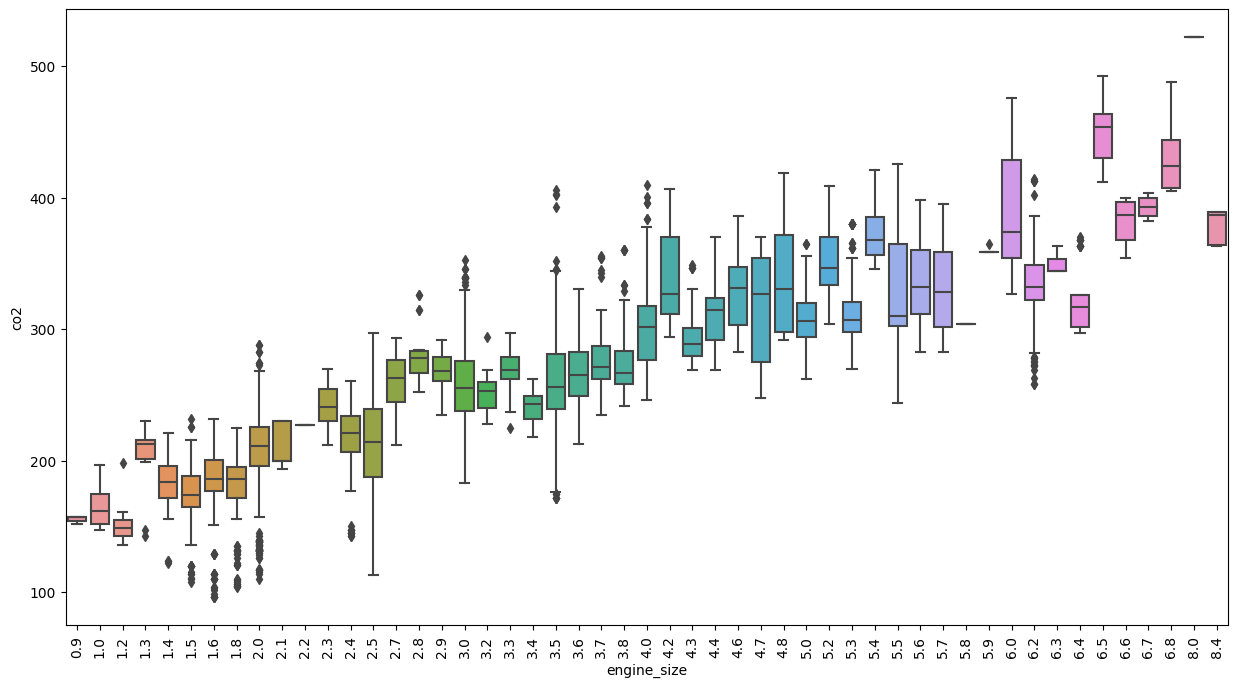

In [26]:
plt.figure(figsize = (15,8))
sns.boxplot(x="engine_size", y="co2", data=df)
plt.xticks(rotation = 90);

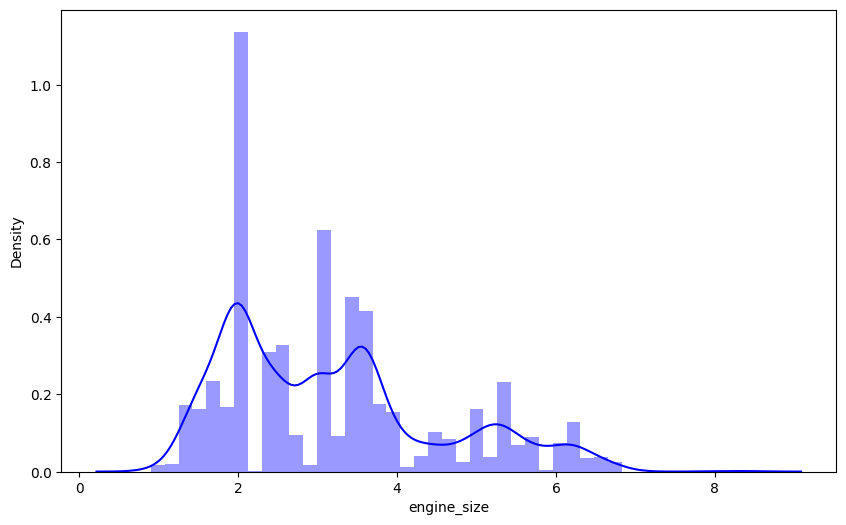

In [27]:
sns.distplot(df.engine_size, color= "b", label= "Skewness : %.2f"%(df.engine_size.skew()));

## Cylinders

In [28]:
df.cylinders.value_counts().sort_values(ascending=False)

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: cylinders, dtype: int64

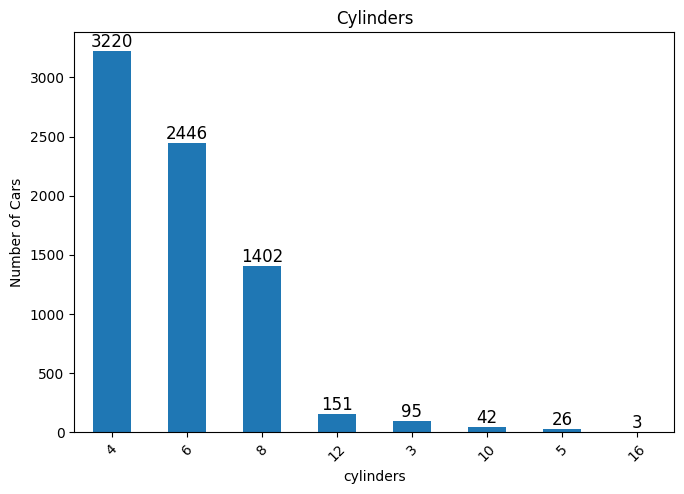

In [29]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.cylinders.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Cylinders')   
plt.xlabel('cylinders') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [30]:
transmission_distr = df['cylinders'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='cylinders', names='index')
fig.update_layout(title="Cylinders Distribution")
fig.show()

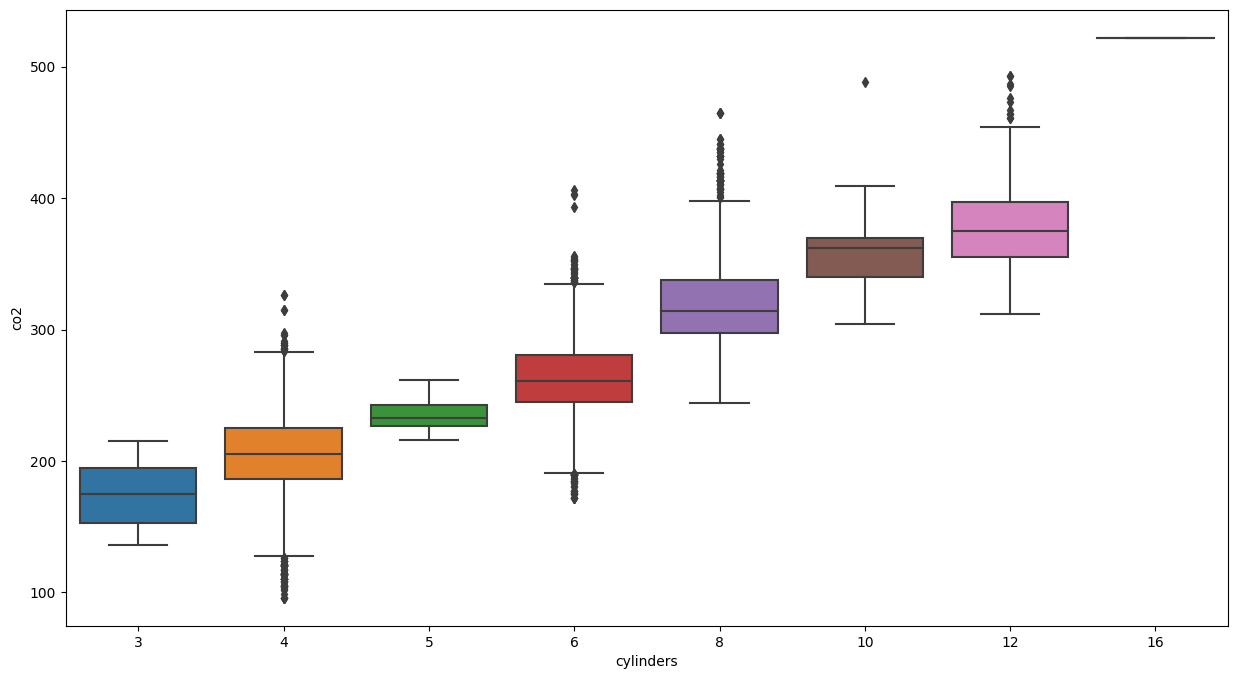

In [31]:
plt.figure(figsize = (15,8))
sns.boxplot(x="cylinders", y="co2", data=df);

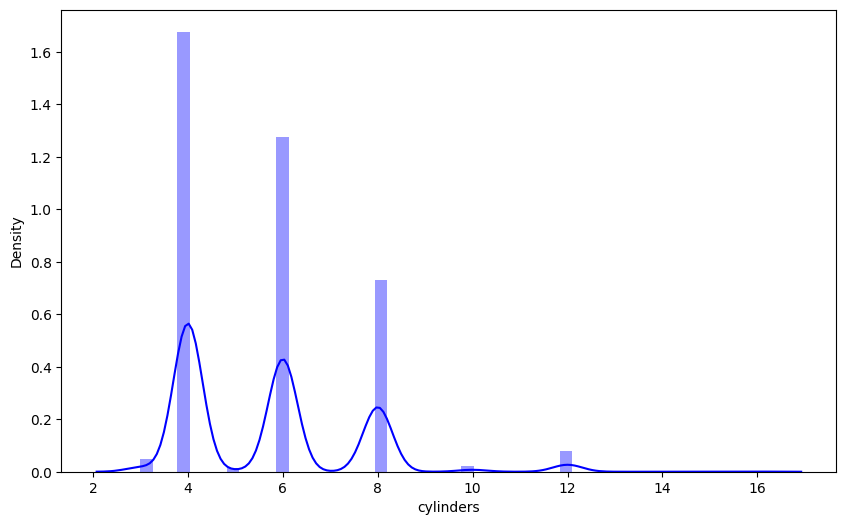

In [32]:
sns.distplot(df.cylinders, color= "b", label= "Skewness : %.2f"%(df.cylinders.skew()));

## Transmission

In [33]:
df.transmission.value_counts().sort_values(ascending=False)

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: transmission, dtype: int64

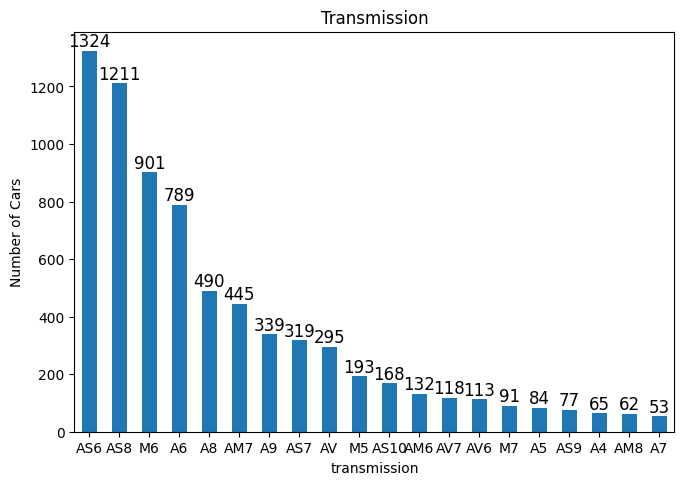

In [34]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.transmission.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Transmission')   
plt.xlabel('transmission') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [35]:
transmission_distr = df['transmission'].value_counts().reset_index()
transmission_distr.columns = ['transmission', 'count']  
fig = px.pie(transmission_distr, values='count', names='transmission')
fig.update_layout(title="Transmission Distribution")
fig.show()

## Fuel Type and Consumption

In [36]:
df.fuel_type.value_counts()

# X = Regular gasoline-benzin
# Z = Premium gasoline-benzin
# D = Diesel
# E = Ethanol (E85)
# N = Natural gas

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64

In [37]:
df[df["fuel_type"] == "N"]

make             model vehicle_class  engine_size  cylinders  \
2439  CHEVROLET  IMPALA DUAL FUEL      MID-SIZE          3.6          6   

     transmission fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
2439          AS6         N            15.2            9.5            12.7   

      fuel_cons_comb_mpg  co2  
2439                  22  213

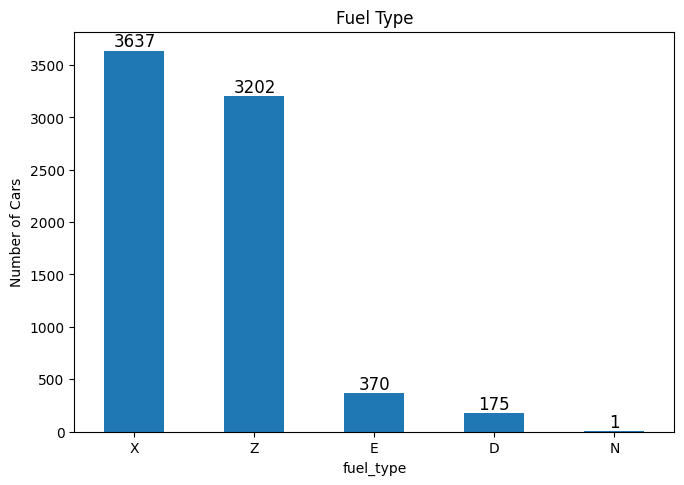

In [38]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.fuel_type.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Fuel Type')   
plt.xlabel('fuel_type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [39]:
df.fuel_cons_city.nunique()

211

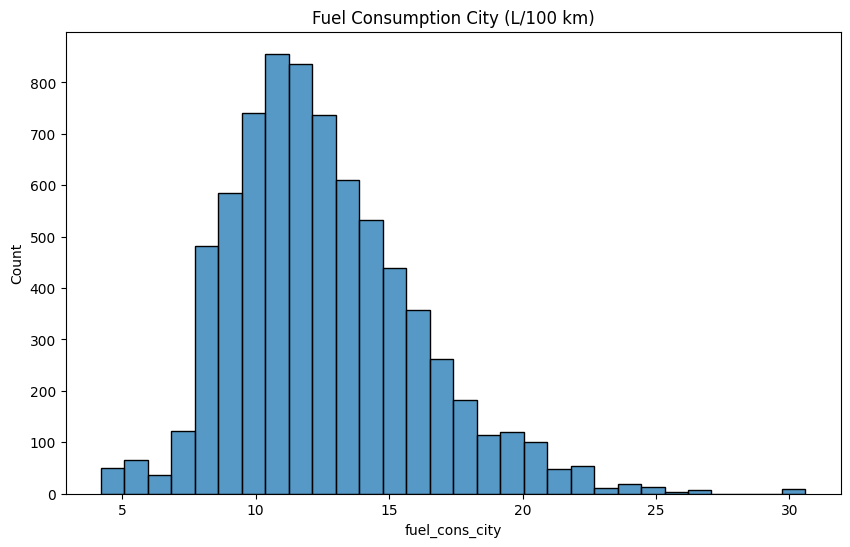

In [40]:
sns.histplot(data=df, x="fuel_cons_city", bins=30)
plt.title('Fuel Consumption City (L/100 km)');

In [41]:
df.fuel_cons_hwy.nunique()

143

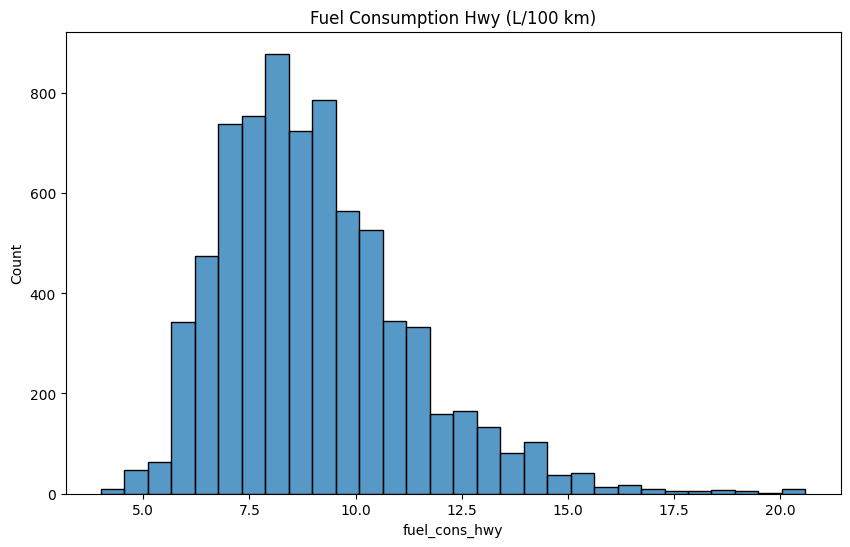

In [42]:
sns.histplot(data=df, x="fuel_cons_hwy", bins=30)
plt.title('Fuel Consumption Hwy (L/100 km)');

In [43]:
df.fuel_cons_comb.nunique()

181

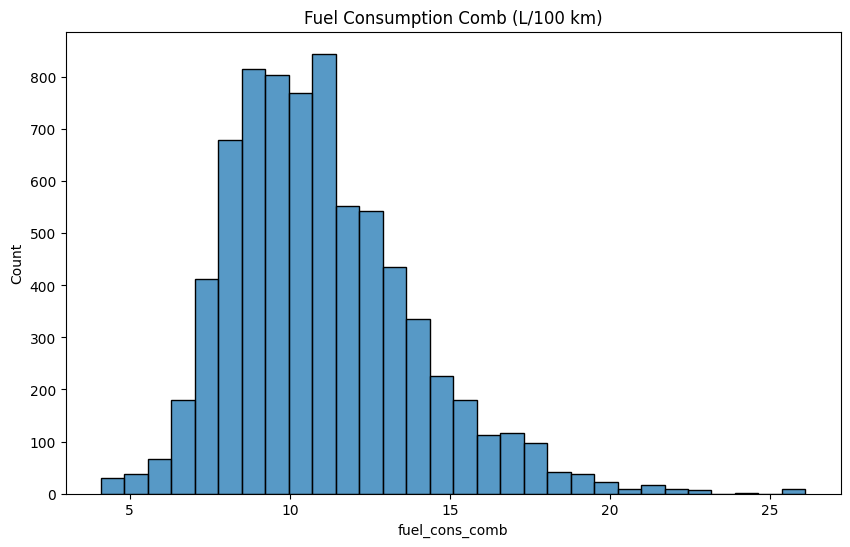

In [44]:
sns.histplot(data=df, x="fuel_cons_comb", bins=30)
plt.title('Fuel Consumption Comb (L/100 km)');

In [45]:
df.fuel_cons_comb_mpg.nunique()

54

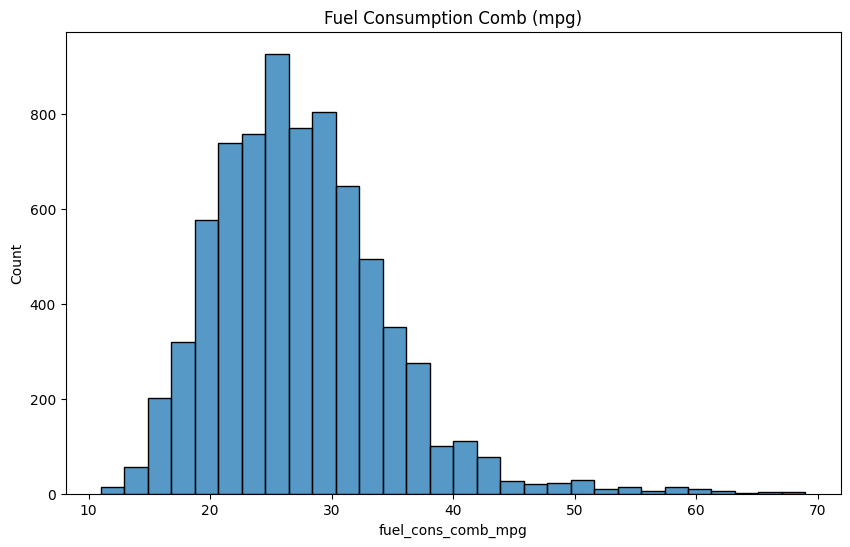

In [46]:
sns.histplot(data=df, x="fuel_cons_comb_mpg", bins=30)
plt.title('Fuel Consumption Comb (mpg)');

<AxesSubplot:xlabel='fuel_type', ylabel='co2'>

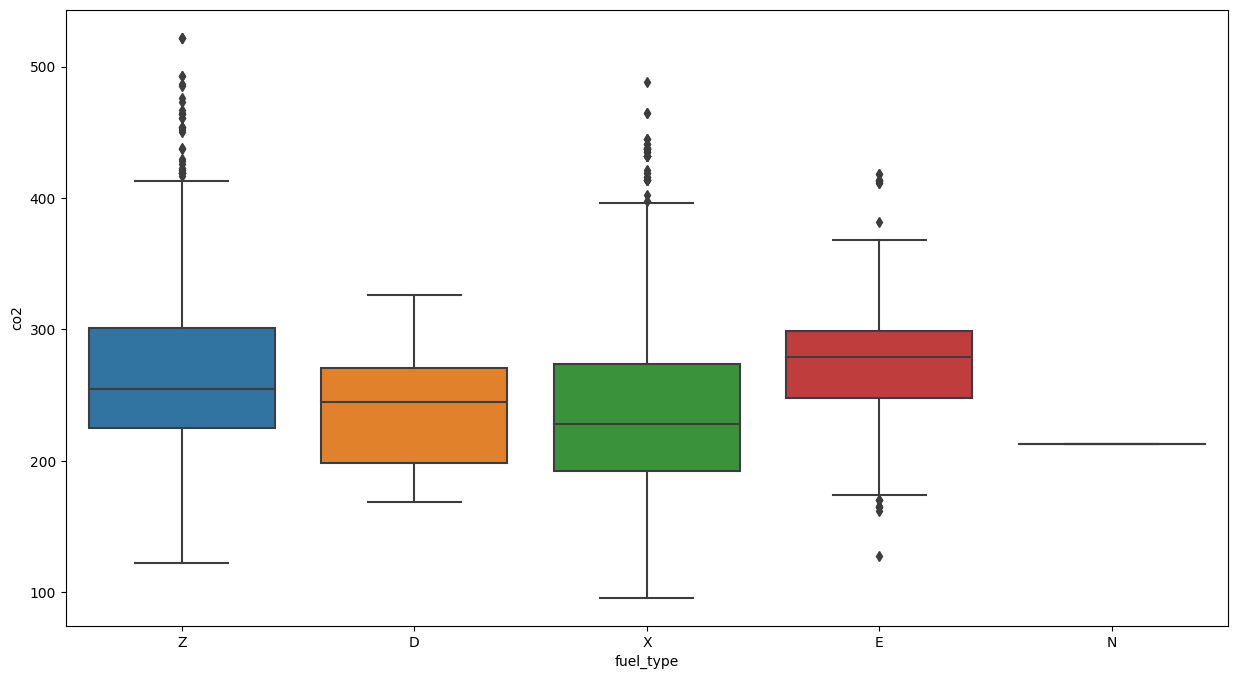

In [47]:
plt.figure(figsize = (15,8))
sns.boxplot(x="fuel_type", y="co2", data=df)

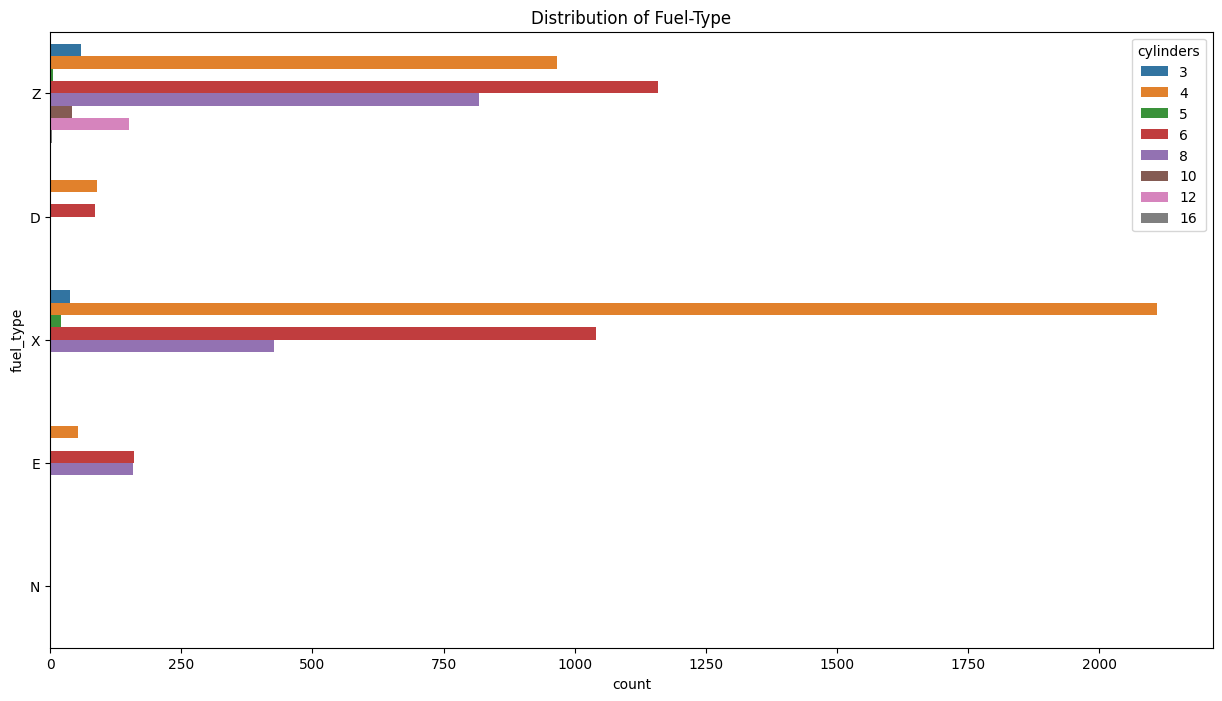

In [48]:
plt.figure(figsize = (15,8))
sns.countplot(y="fuel_type", data=df, hue='cylinders')
plt.title('Distribution of Fuel-Type');

## CO2 Emissions¶

In [49]:
df[df.co2 == df.co2.min()]

make       model vehicle_class  engine_size  cylinders transmission  \
3824  HYUNDAI  IONIQ BLUE     FULL-SIZE          1.6          4          AM6   
4900  HYUNDAI  IONIQ BLUE     FULL-SIZE          1.6          4          AM6   
5931  HYUNDAI  IONIQ Blue     FULL-SIZE          1.6          4          AM6   
6950  HYUNDAI  IONIQ Blue     FULL-SIZE          1.6          4          AM6   

     fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
3824         X             4.2            4.0             4.1   
4900         X             4.2            4.0             4.1   
5931         X             4.2            4.0             4.1   
6950         X             4.2            4.0             4.1   

      fuel_cons_comb_mpg  co2  
3824                  69   96  
4900                  69   96  
5931                  69   96  
6950                  69   96

In [50]:
df[df.co2 == df.co2.max()]

make   model vehicle_class  engine_size  cylinders transmission  \
4509  BUGATTI  CHIRON    TWO-SEATER          8.0         16          AM7   
5575  BUGATTI  Chiron    TWO-SEATER          8.0         16          AM7   
6640  BUGATTI  Chiron    TWO-SEATER          8.0         16          AM7   

     fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
4509         Z            26.8           16.6            22.2   
5575         Z            26.8           16.6            22.2   
6640         Z            26.8           16.6            22.2   

      fuel_cons_comb_mpg  co2  
4509                  13  522  
5575                  13  522  
6640                  13  522

## Correlation

In [51]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

# Sadece sayısal verileri içeren bir DataFrame oluştur
numeric_df = df.select_dtypes(include=[np.number])

# Sayısal DataFrame üzerinde korelasyon hesapla ve stillendir
numeric_df.corr().style.applymap(color_correlation1)


# - Korelasyon katsayısı `0.6` ile `0.99999` arasında veya `-0.6` ile `-0.99999` arasında ise, renk `kırmızı` olur.
# Bu, güçlü bir korelasyonu (pozitif veya negatif) gösterir.
# - Eğer korelasyon katsayısı `0.3` ile `0.6` arasında veya `-0.3` ile `-0.6` arasında ise,renk `mavi` olur.
# Bu, orta derecede bir korelasyonu gösterir.
# - Eğer korelasyon katsayısı tam `1` ise, renk `yeşil` olur. Bu, mükemmel pozitif korelasyonu gösterir.
# - Diğer tüm durumlar için renk `siyah` olur, bu da zayıf veya hiç korelasyon olmadığını gösterir.

In [52]:
df.corr()

engine_size  cylinders  fuel_cons_city  fuel_cons_hwy  \
engine_size            1.000000   0.927653        0.831379       0.761526   
cylinders              0.927653   1.000000        0.800702       0.715252   
fuel_cons_city         0.831379   0.800702        1.000000       0.948180   
fuel_cons_hwy          0.761526   0.715252        0.948180       1.000000   
fuel_cons_comb         0.817060   0.780534        0.993810       0.977299   
fuel_cons_comb_mpg    -0.757854  -0.719321       -0.927059      -0.890638   
co2                    0.851145   0.832644        0.919592       0.883536   

                    fuel_cons_comb  fuel_cons_comb_mpg       co2  
engine_size               0.817060           -0.757854  0.851145  
cylinders                 0.780534           -0.719321  0.832644  
fuel_cons_city            0.993810           -0.927059  0.919592  
fuel_cons_hwy             0.977299           -0.890638  0.883536  
fuel_cons_comb            1.000000           -0.925576  0.918052  
fuel_cons_comb_mpg       -0.925576            1.000000 -0.907426  
co2                       0.918052           -0.907426  1.000000

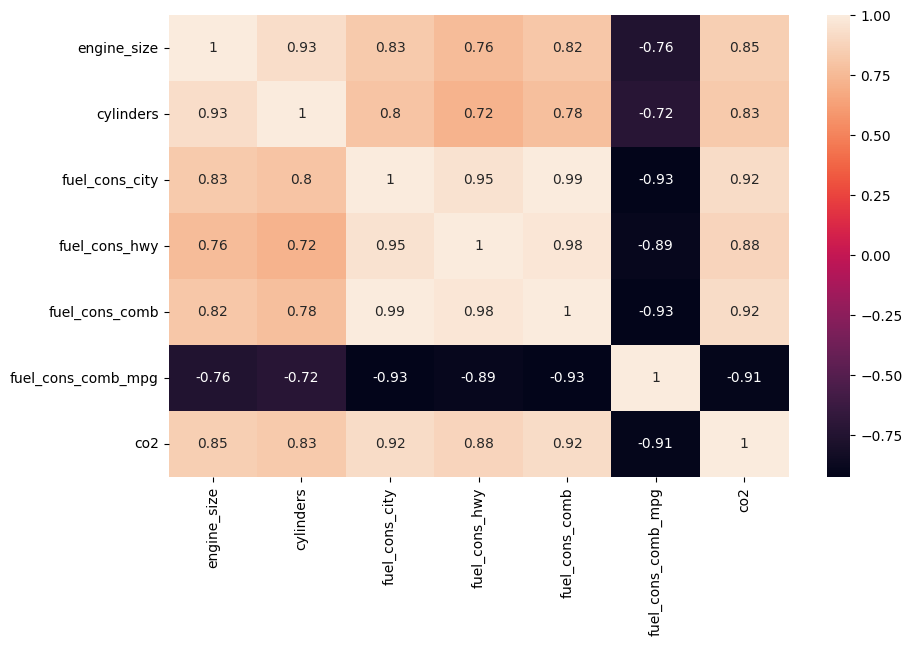

In [53]:
sns.heatmap(df.corr(), annot=True);

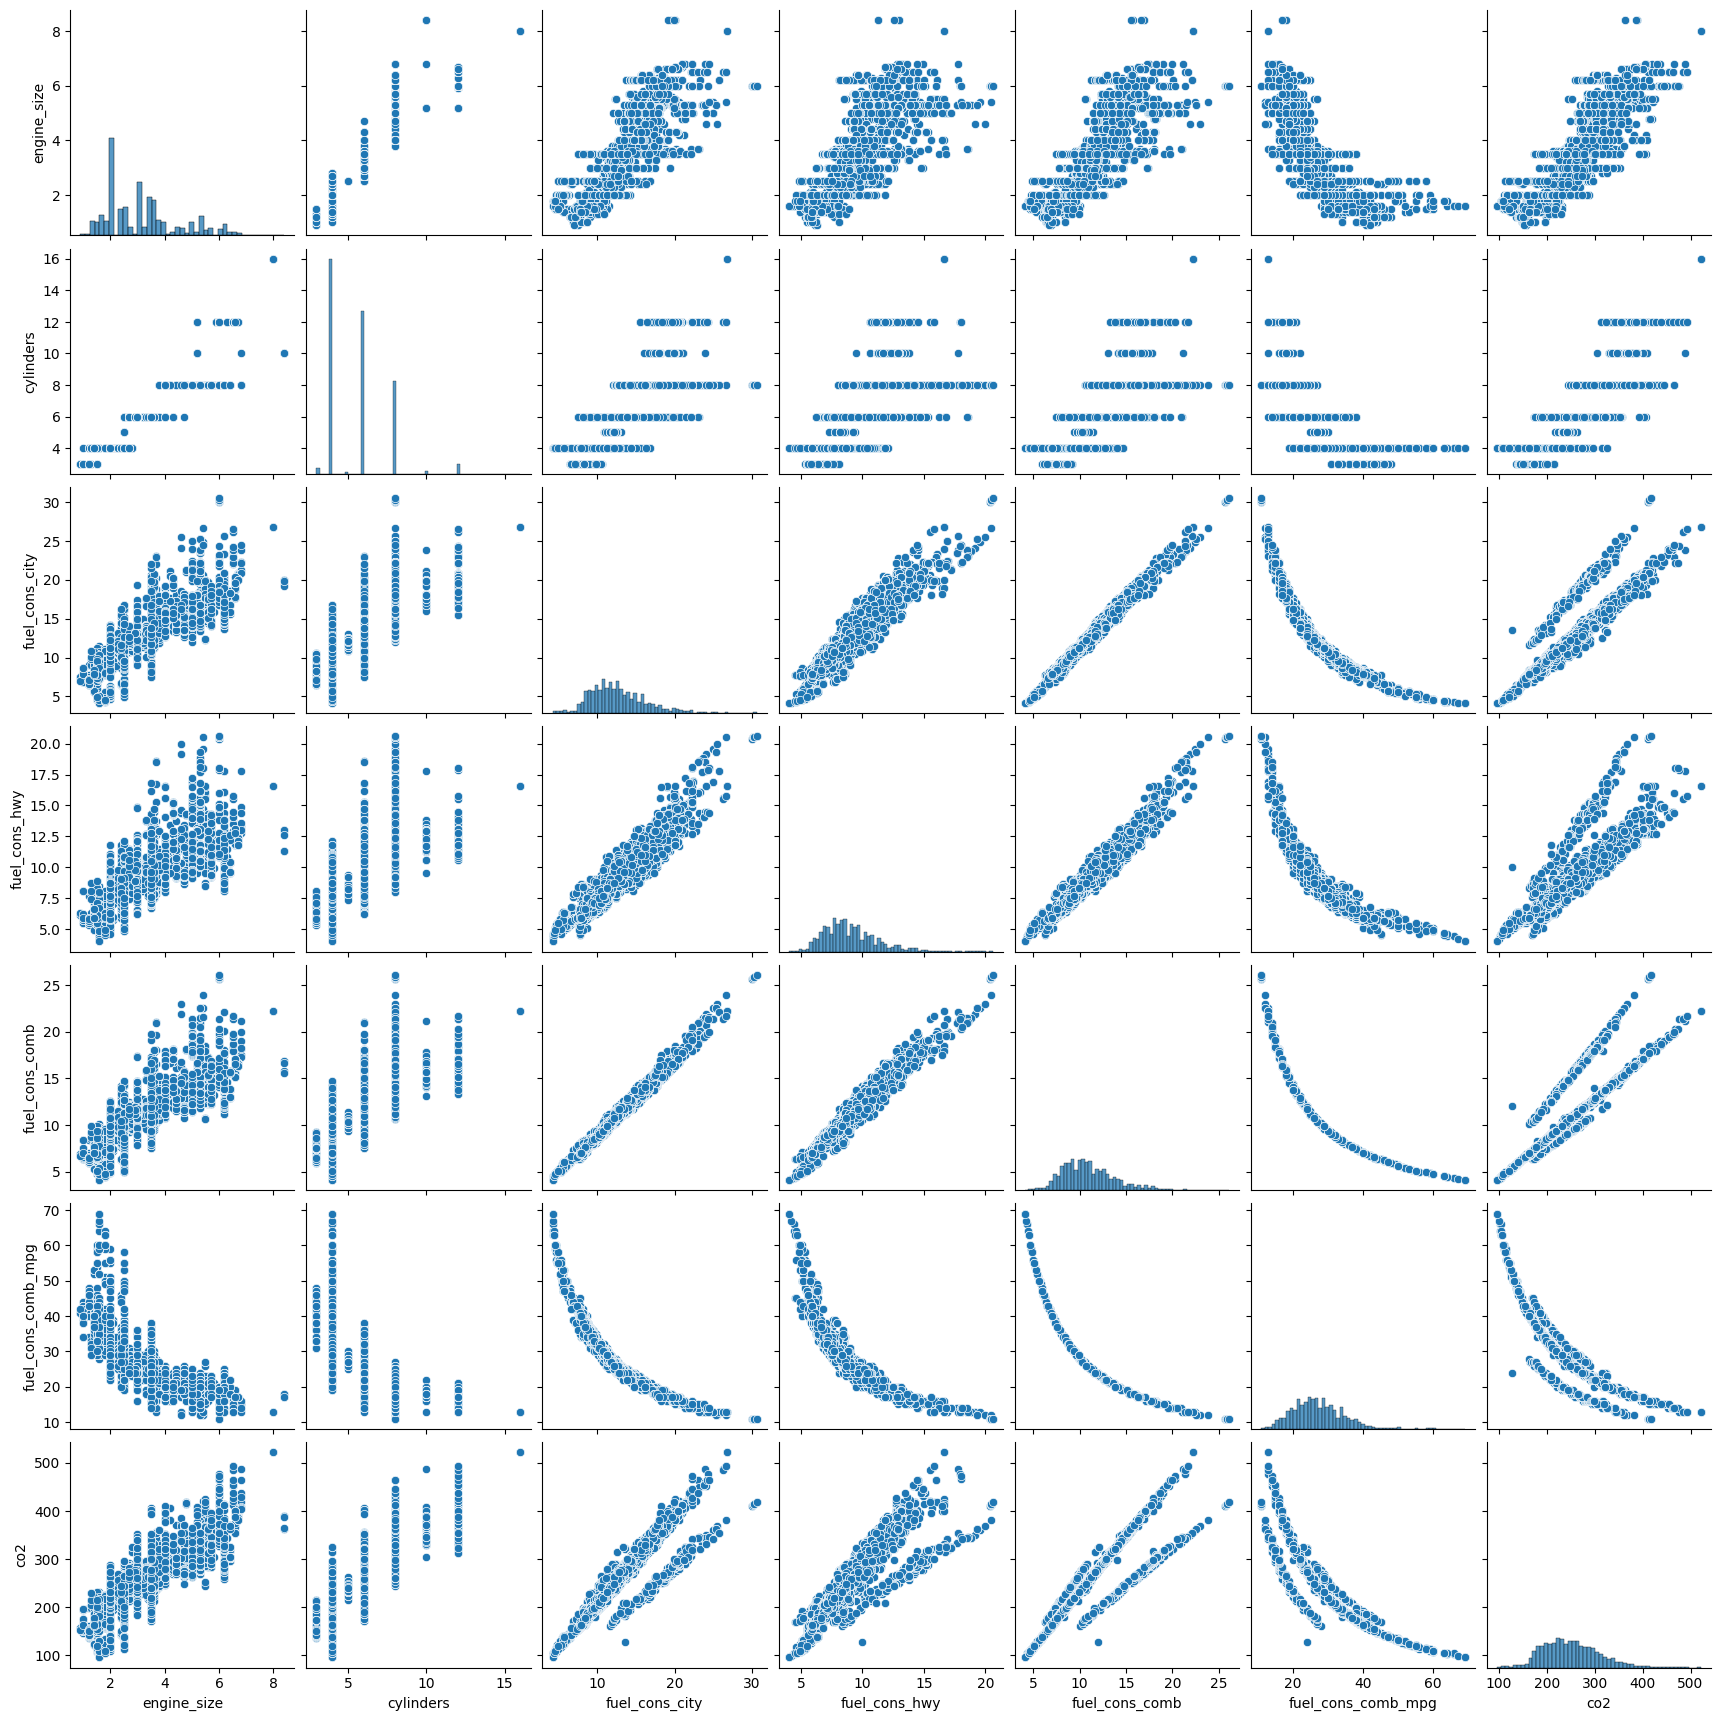

In [54]:
sns.pairplot(df);

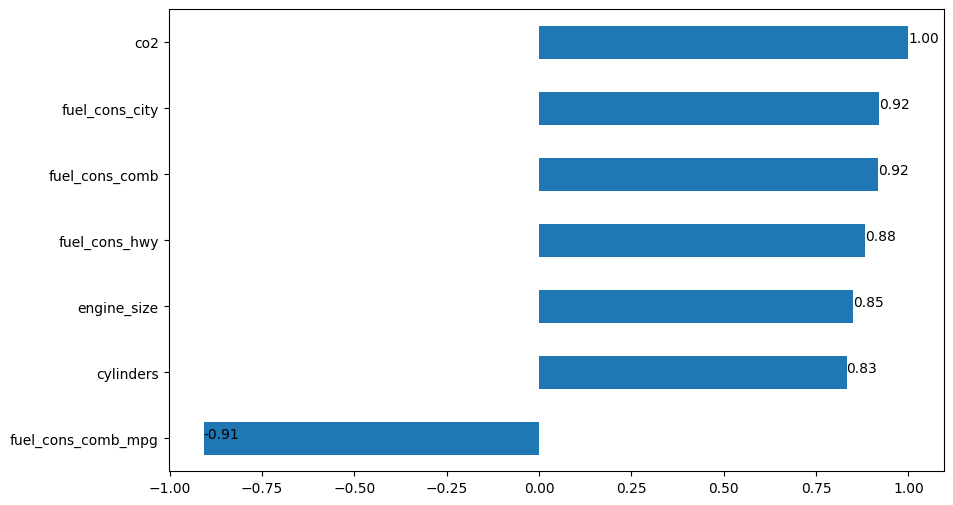

In [55]:
corr_values = numeric_df.corr()["co2"].sort_values()
ax = corr_values.plot.barh()
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

In [56]:
df1 = df.copy()

# **Simple Linear Regression Model**

In [57]:
corr = df.co2.corr(df.engine_size)
corr

0.8511446437900011

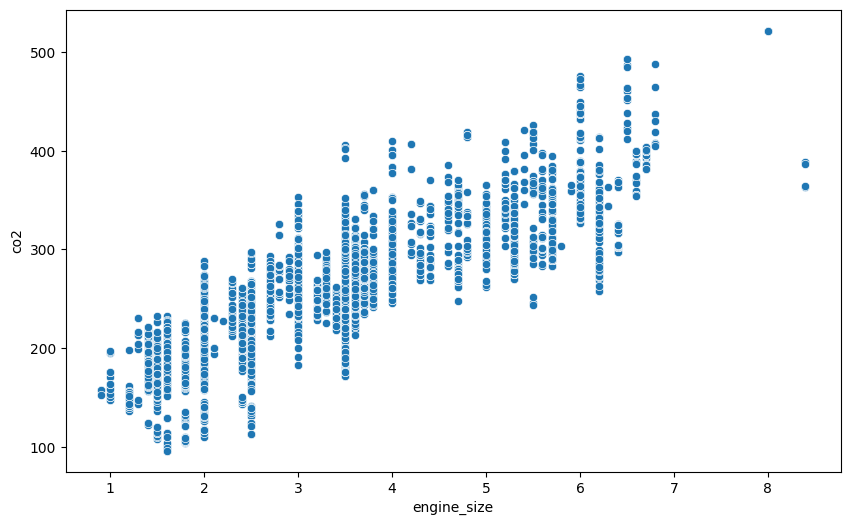

In [58]:
sns.scatterplot(x="engine_size", y="co2", data=df);

In [59]:
R2_score = corr**2
R2_score

0.7244472046524079

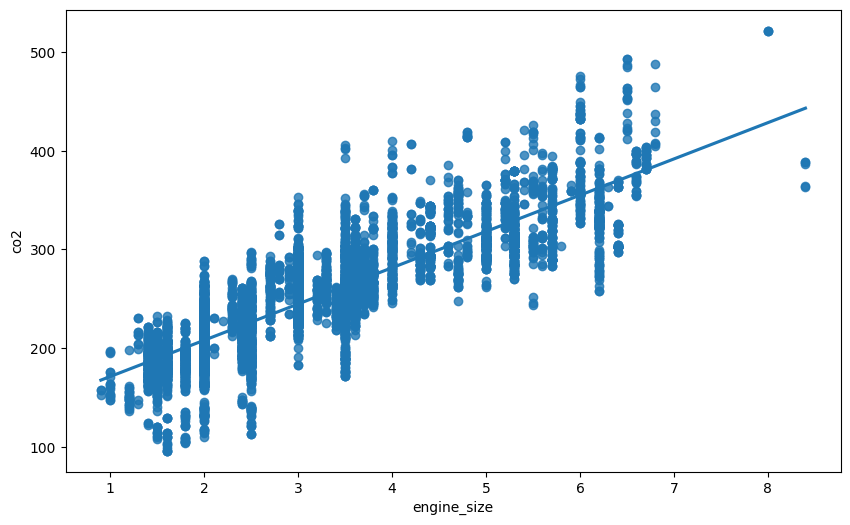

In [60]:
sns.regplot(x="engine_size", y="co2", data=df, ci=None);

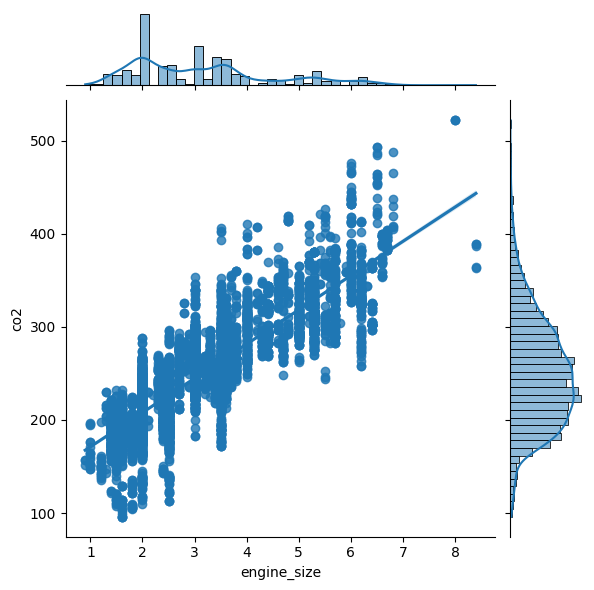

In [61]:
sns.jointplot(y=df['co2'], x=df['engine_size'],  kind='reg');

## Spliting the dataset into X and y 

In [62]:
X = df["engine_size"]
y = df["co2"]

### Theoritical

In [63]:
np.polyfit(X, y, deg=1)   # b0=134.36  and b1=36.78

array([ 36.77731519, 134.36589272])

In [64]:
slope, intercept = np.polyfit(X, y, deg=1)
print("slope    :", slope)
print("intercept:", intercept)

slope    : 36.77731518642009
intercept: 134.36589272349337


In [65]:
b1, b0 = np.polyfit(X, y, deg = 1)
print("b1 :", b1)
print("b0 :", b0)

b1 : 36.77731518642009
b0 : 134.36589272349337


In [66]:
y_pred = b1*X + b0
y_pred

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: engine_size, Length: 7385, dtype: float64

In [67]:
values = {"actual_CO2": y, "predicted_CO2":y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_slr = pd.DataFrame(values)
df_slr

actual_CO2  predicted_CO2   residual          LSE
0            196     207.920523 -11.920523   142.098871
1            221     222.631449  -1.631449     2.661626
2            136     189.531866 -53.531866  2865.660624
3            255     263.086496  -8.086496    65.391416
4            244     263.086496 -19.086496   364.294325
...          ...            ...        ...          ...
7380         219     207.920523  11.079477   122.754808
7381         232     207.920523  24.079477   579.821208
7382         240     207.920523  32.079477  1029.092838
7383         232     207.920523  24.079477   579.821208
7384         248     207.920523  40.079477  1606.364469

[7385 rows x 4 columns]

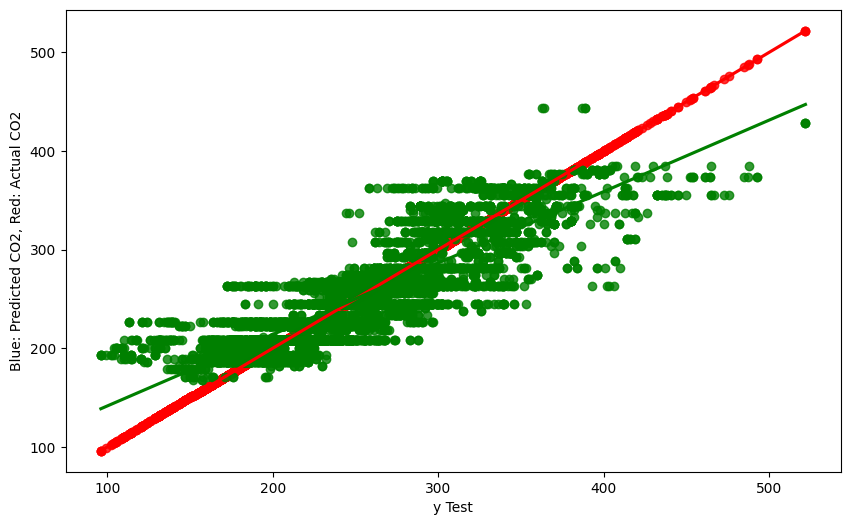

In [68]:
sns.regplot(x=y, y=df_slr["actual_CO2"], color="r", ci=None)
sns.regplot(x=y, y=df_slr["predicted_CO2"], color="g", ci=None)

plt.xlabel('y Test')
plt.ylabel('Blue: Predicted CO2, Red: Actual CO2')

plt.show()

In [69]:
df_slr.residual.sum().round() 

-0.0

In [70]:
df_slr.LSE.sum()

6966208.685372684

### With Simple Linear Regressions model

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = df[['engine_size']]
y = df['co2']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5908, 1)
Train target shape   :  (5908,)
Test features shape  :  (1477, 1)
Test target shape    :  (1477,)


In [75]:
X_train.head()

engine_size
1095          2.0
3538          5.3
2377          2.5
3414          4.4
880           3.4

#### Model training

In [76]:
from sklearn.linear_model import LinearRegression 

In [77]:
slr = LinearRegression()

In [78]:
slr.fit(X_train, y_train) 

LinearRegression()

In [79]:
slr.coef_

array([36.70483532])

In [80]:
slr.intercept_

134.5737656322778

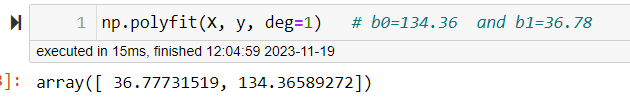

**Prediction**

In [81]:
y_train_pred = slr.predict(X_train)

In [82]:
y_pred = slr.predict(X_test)

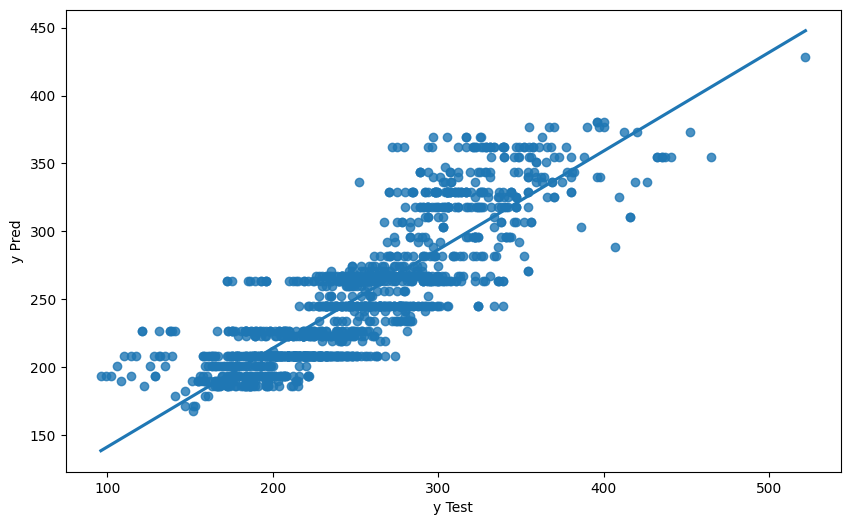

In [83]:
sns.regplot(x=y_test, y=y_pred, ci=None)

plt.xlabel('y Test')
plt.ylabel('y Pred')

plt.show()

### Evaluation of Model

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [85]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [86]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, "s_linear")
slr_score 

s_linear_train  s_linear_test
R2          0.722168       0.733527
mae        23.347037      23.025089
mse       950.918477     912.834643
rmse       30.836966      30.213153

In [87]:
avg_em= df['co2'].mean()
avg_em

250.58469871360867

In [88]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

30.21315347684375

**Residuals**

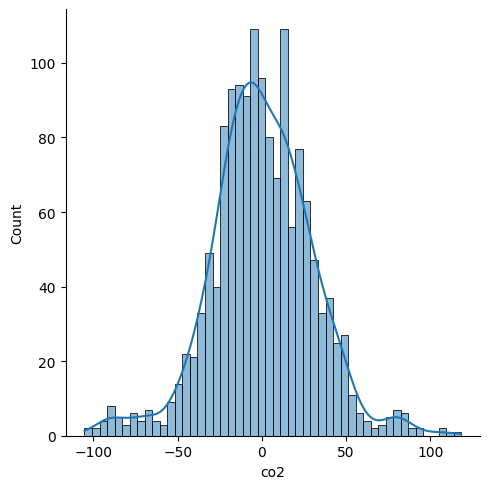

In [89]:
sns.displot((y_test-y_pred), bins=50, kde=True);

**Prediction Error for Linear Regression**

In [90]:
from yellowbrick.regressor import PredictionError

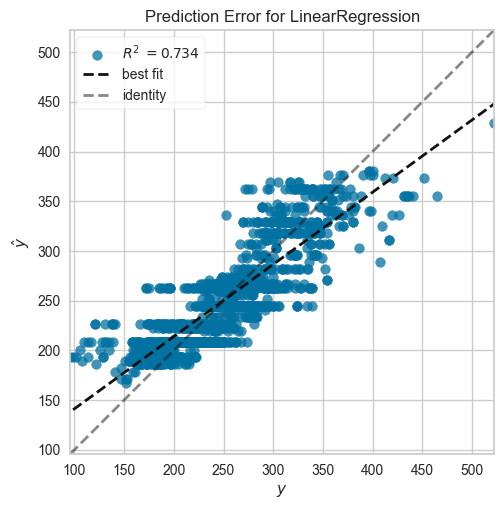

In [91]:
model = LinearRegression() 
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)    
visualizer.score(X_test, y_test)  
visualizer.show(); 

### New Predictions with Simple Linear Regression

In [92]:
potential_engSize = np.linspace(0.5, 9.0, 20) 
potential_engSize = pd.DataFrame(potential_engSize) 
potential_engSize

0
0   0.500000
1   0.947368
2   1.394737
3   1.842105
4   2.289474
5   2.736842
6   3.184211
7   3.631579
8   4.078947
9   4.526316
10  4.973684
11  5.421053
12  5.868421
13  6.315789
14  6.763158
15  7.210526
16  7.657895
17  8.105263
18  8.552632
19  9.000000

In [93]:
predicted_co2_lin = b1*potential_engSize + b0
predicted_co2_lin

0
0   152.754550
1   169.207560
2   185.660569
3   202.113579
4   218.566588
5   235.019597
6   251.472607
7   267.925616
8   284.378626
9   300.831635
10  317.284645
11  333.737654
12  350.190663
13  366.643673
14  383.096682
15  399.549692
16  416.002701
17  432.455711
18  448.908720
19  465.361729

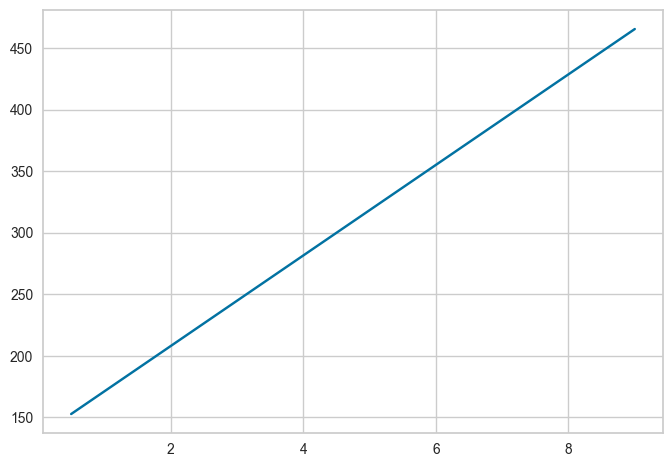

In [94]:
plt.plot(potential_engSize, predicted_co2_lin);

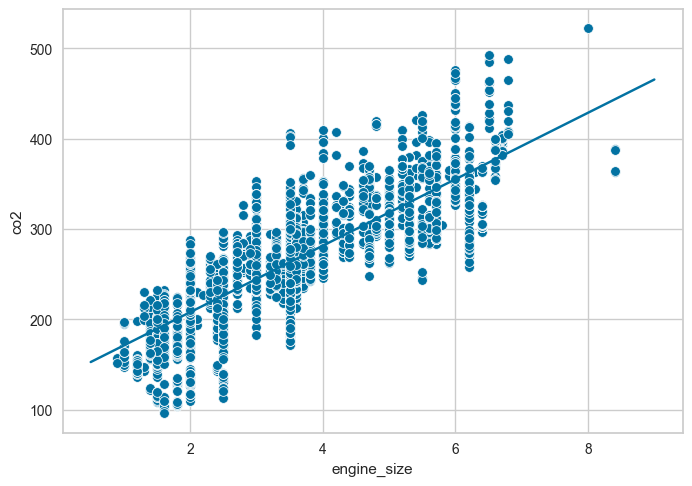

In [95]:
plt.plot(potential_engSize, predicted_co2_lin)
sns.scatterplot(x="engine_size", y="co2", data=df);

**Wtih the Model**

In [96]:
new_predictions = slr.predict(potential_engSize)
new_predictions

array([152.92618329, 169.34676751, 185.76735173, 202.18793595,
       218.60852017, 235.02910439, 251.44968861, 267.87027283,
       284.29085705, 300.71144127, 317.13202549, 333.55260971,
       349.97319393, 366.39377815, 382.81436237, 399.23494659,
       415.65553082, 432.07611504, 448.49669926, 464.91728348])

## To improve the predictions with polynominal funktions

In [97]:
X = df['engine_size']
y = df['co2']

In [98]:
a = np.polyfit(X,y, deg=3)
a

array([ 0.5532652 , -8.69737899, 76.04439217, 84.89105185])

In [99]:
a1 = np.polyfit(X, y, deg=3)[0]
a2 = np.polyfit(X, y, deg=3)[1]
a3 = np.polyfit(X, y, deg=3)[2]
a0 = np.polyfit(X, y, deg=3)[3]

In [100]:
# to get the predictions for polynominacl funtions
predicted_co2_poly = a1 * potential_engSize**3 + a2 * potential_engSize**2 + a3 * potential_engSize + a0
predicted_co2_poly

0
0   120.808061
1   149.597574
2   175.535137
3   198.917972
4   220.043300
5   239.208343
6   256.710323
7   272.846462
8   287.913981
9   302.210102
10  316.032047
11  329.677038
12  343.442296
13  357.625043
14  372.522501
15  388.431892
16  405.650437
17  424.475358
18  445.203877
19  468.133215

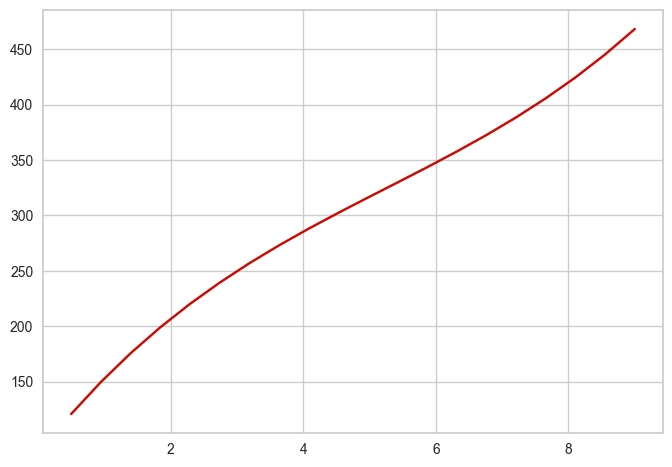

In [101]:
plt.plot(potential_engSize, predicted_co2_poly, color="r");

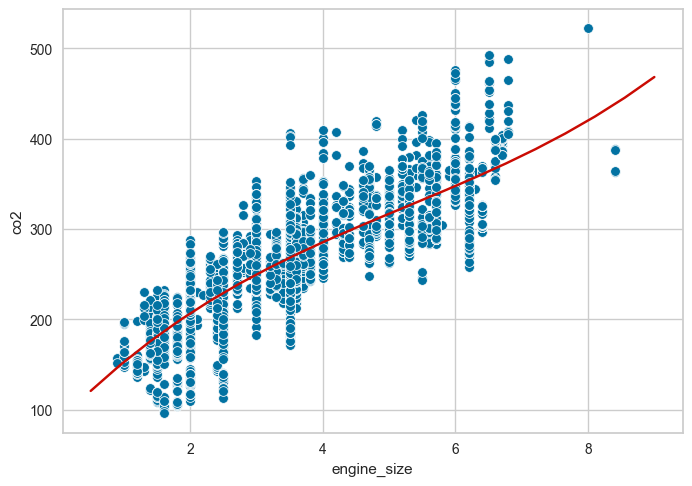

In [102]:
plt.plot(potential_engSize, predicted_co2_poly, color="r");
sns.scatterplot(x="engine_size", y="co2", data=df);

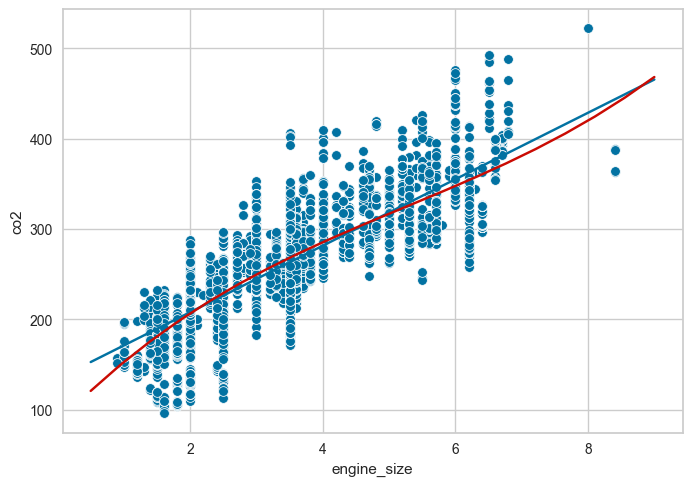

In [103]:
plt.plot(potential_engSize, predicted_co2_lin)
plt.plot(potential_engSize, predicted_co2_poly, color="r");
sns.scatterplot(x="engine_size", y="co2", data=df);

In [104]:
eng_size = 2.6
co2_pred_lin = b1*eng_size + b0
co2_pred_poly = a1*eng_size**3 + a2*eng_size**2 + a3*eng_size + a0

print(co2_pred_lin, co2_pred_poly)

229.98691220818563 233.53637870725458


In [105]:
eng_size = 2.2
co2_pred_lin = b1*eng_size + b0
co2_pred_poly = a1*eng_size**3 + a2*eng_size**2 + a3*eng_size + a0

print(co2_pred_lin, co2_pred_poly)

215.27598613361758 215.9845681801998


In [106]:
eng_size = 1.8
co2_pred_lin = b1*eng_size + b0
co2_pred_poly = a1*eng_size**3 + a2*eng_size**2 + a3*eng_size + a0

print(co2_pred_lin, co2_pred_poly)

200.56506005904953 196.81809248307133


In [107]:
eng_size = 1.2
co2_pred_lin = b1*eng_size + b0
co2_pred_poly = a1*eng_size**3 + a2*eng_size**2 + a3*eng_size + a0

print(co2_pred_lin, co2_pred_poly)

178.49867094719747 164.57613897390212


# Multiple Linear Regression Model

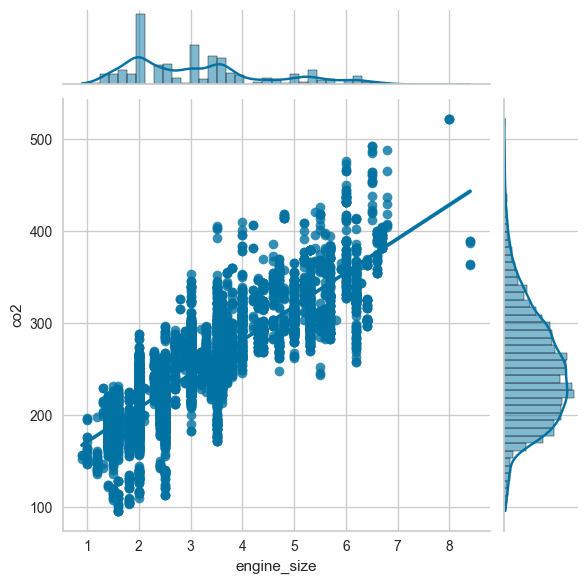

In [108]:
sns.jointplot(y=df['co2'], x=df['engine_size'],  kind='reg');

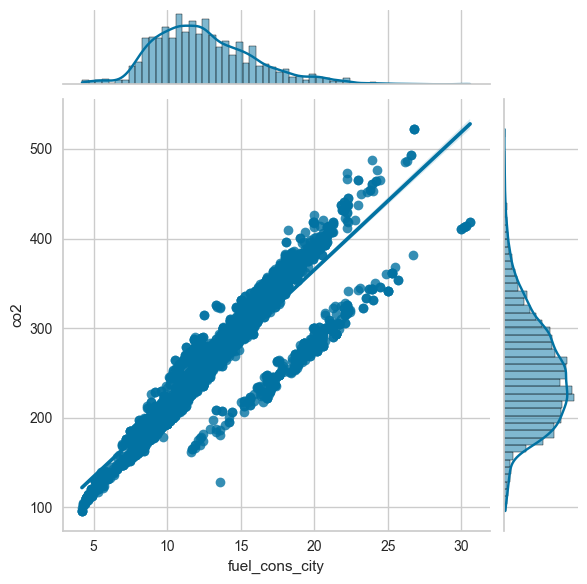

In [109]:
sns.jointplot(y=df['co2'], x=df['fuel_cons_city'],  kind='reg');

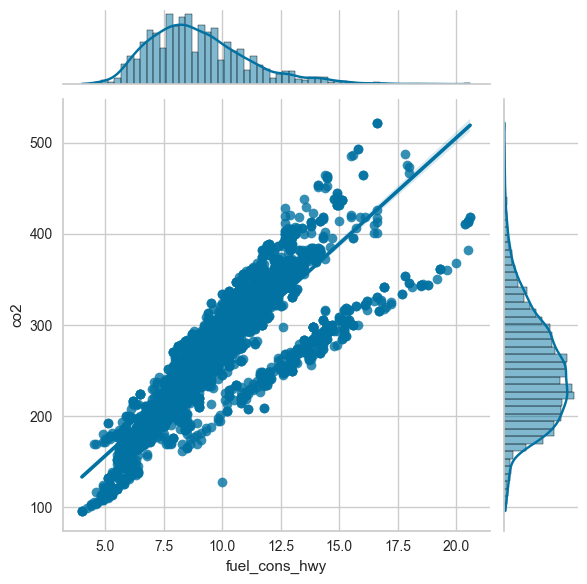

In [110]:
sns.jointplot(y=df['co2'], x=df['fuel_cons_hwy'],  kind='reg');

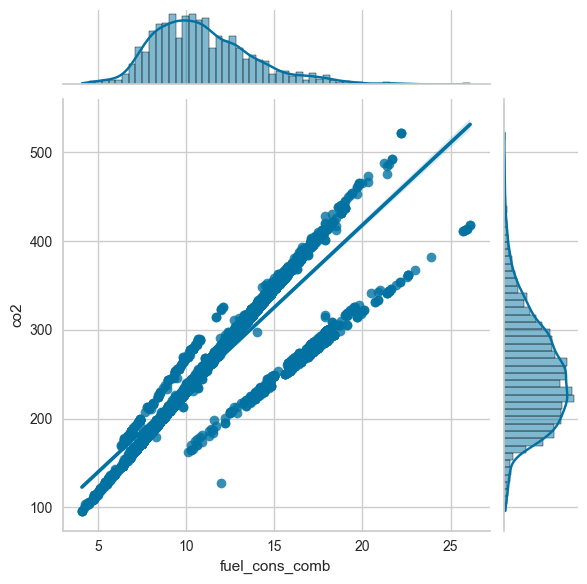

In [111]:
sns.jointplot(y=df['co2'], x=df['fuel_cons_comb'],  kind='reg');

## splitting X and y

In [112]:
X = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']]
y = df['co2']

## Multicollinearity

In [113]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
numeric_df.corr().style.applymap(color_correlation2)

## Splitting Train and Test datas

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5908, 4)
Train target shape   :  (5908,)
Test features shape  :  (1477, 4)
Test target shape    :  (1477,)


## Model training

In [117]:
mlr = LinearRegression()

In [118]:
mlr.fit(X_train, y_train)

LinearRegression()

In [119]:
mlr.coef_

array([12.76444704,  2.50397545,  0.51884685, 10.27807703])

In [120]:
mlr.intercept_

61.41912389764843

## Predicting Test Data

In [121]:
y_train_pred = mlr.predict(X_train)

In [122]:
y_pred = mlr.predict(X_test)

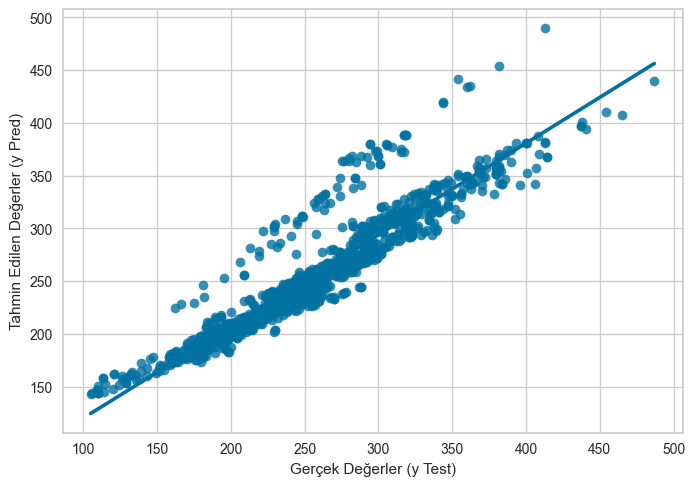

In [123]:
data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

sns.regplot(data=data, x='y_test', y='y_pred', ci=None)
plt.xlabel('Gerçek Değerler (y Test)')
plt.ylabel('Tahmin Edilen Değerler (y Pred)')
plt.show()

## Evaluating the Model

In [124]:
avg_em= df['co2'].mean()
avg_em

250.58469871360867

In [125]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

21.03498552773294

In [126]:
rmse/avg_em 

0.08394361521560285

In [127]:
y_pred = mlr.predict(X_test)
y_train_pred = mlr.predict(X_train)

In [128]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

linear_train  linear_test
R2        0.874248     0.871361
mae      13.448848    13.519154
mse     429.888383   442.470616
rmse     20.733750    21.034986

## Cross Validation

In [129]:
from sklearn.metrics import get_scorer_names

scorers = get_scorer_names()
print(scorers)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

In [130]:
from sklearn.model_selection import cross_validate, cross_val_score

In [131]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [132]:
pd.DataFrame(scores, index = range(1,11))

fit_time  score_time   test_r2  train_r2  test_neg_mean_absolute_error  \
1   0.003100    0.001008  0.869205  0.874809                    -13.739786   
2   0.002791    0.001546  0.874288  0.874124                    -12.853381   
3   0.003009    0.001001  0.872704  0.874400                    -13.885354   
4   0.002044    0.001022  0.859309  0.875680                    -13.398961   
5   0.001534    0.001596  0.859484  0.875859                    -14.101987   
6   0.002010    0.001999  0.855050  0.876239                    -13.669038   
7   0.002012    0.001759  0.896184  0.871615                    -12.855013   
8   0.002350    0.002191  0.880169  0.873554                    -13.352262   
9   0.003001    0.001545  0.886689  0.872918                    -12.778562   
10  0.001646    0.001008  0.880513  0.873418                    -14.003984   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                      -13.417862                  -448.866468   
2                      -13.541005                  -377.823054   
3                      -13.349587                  -467.513717   
4                      -13.430025                  -429.844668   
5                      -13.225609                  -491.092260   
6                      -13.393147                  -470.066559   
7                      -13.642578                  -373.795711   
8                      -13.475126                  -421.798912   
9                      -13.626870                  -366.340205   
10                     -13.380151                  -464.375036   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                    -427.784723                        -21.186469   
2                    -435.755033                        -19.437671   
3                    -425.784357                        -21.622066   
4                    -429.948704                        -20.732696   
5                    -423.302537                        -22.160602   
6                    -425.440002                        -21.681018   
7                    -436.261041                        -19.333797   
8                    -430.801438                        -20.537744   
9                    -437.051749                        -19.140016   
10                   -426.085809                        -21.549363   

    train_neg_root_mean_squared_error  
1                          -20.682957  
2                          -20.874746  
3                          -20.634543  
4                          -20.735204  
5                          -20.574317  
6                          -20.626197  
7                          -20.886863  
8                          -20.755757  
9                          -20.905783  
10                         -20.641846

In [133]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                0.873360
train_r2                               0.874262
test_neg_mean_absolute_error         -13.463833
train_neg_mean_absolute_error        -13.448196
test_neg_mean_squared_error         -431.151659
train_neg_mean_squared_error        -429.821539
test_neg_root_mean_squared_error     -20.738144
train_neg_root_mean_squared_error    -20.731821
dtype: float64

In [134]:
mlr_score = train_val(y_train, y_train_pred, y_test, y_pred, "m_linear")
mlr_score

m_linear_train  m_linear_test
R2          0.874248       0.871361
mae        13.448848      13.519154
mse       429.888383     442.470616
rmse       20.733750      21.034986

In [135]:
pd.concat([slr_score, mlr_score], axis=1)

s_linear_train  s_linear_test  m_linear_train  m_linear_test
R2          0.722168       0.733527        0.874248       0.871361
mae        23.347037      23.025089       13.448848      13.519154
mse       950.918477     912.834643      429.888383     442.470616
rmse       30.836966      30.213153       20.733750      21.034986

In [136]:
print("train RMSE:", 20.733750/df["co2"].mean())
print("CV RMSE:", 21.034986/df["co2"].mean())

train RMSE: 0.08274148464147224
CV RMSE: 0.08394361710026327


In [137]:
mlr.coef_

array([12.76444704,  2.50397545,  0.51884685, 10.27807703])

In [138]:
mlr_df = pd.DataFrame(mlr.coef_, index=X_train.columns, columns = ["mlr_coef"])
mlr_df

mlr_coef
engine_size     12.764447
fuel_cons_city   2.503975
fuel_cons_hwy    0.518847
fuel_cons_comb  10.278077

## Residuals

In [139]:
residuals = y_test-y_pred

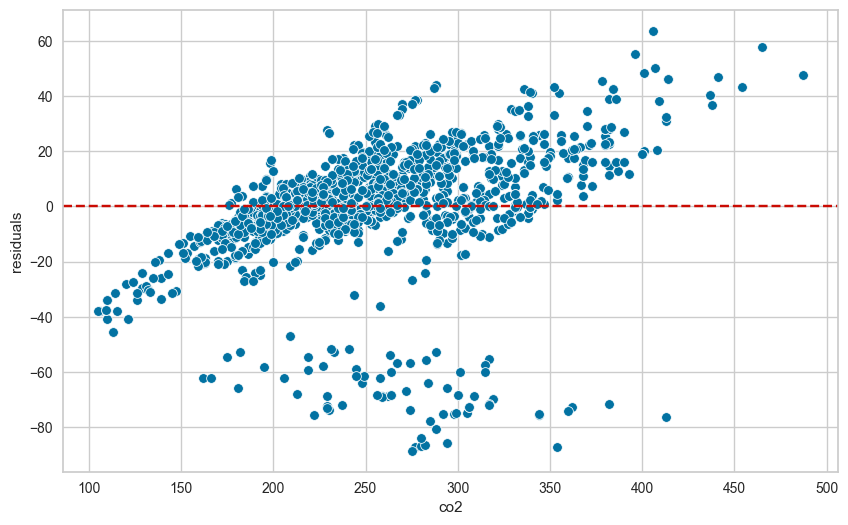

In [140]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals");

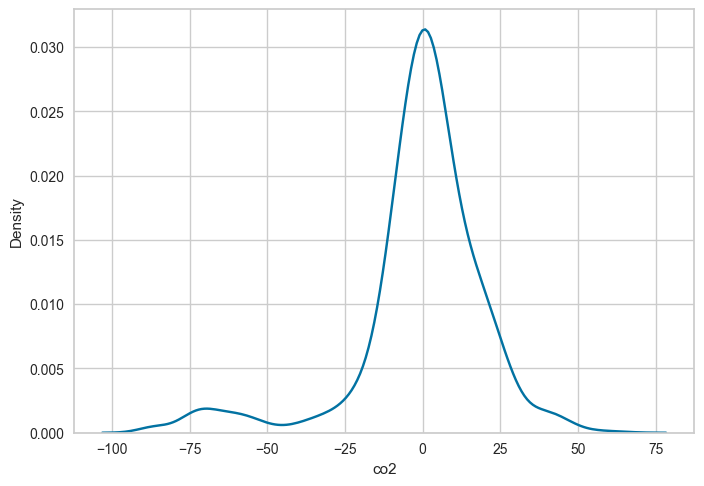

In [141]:
sns.kdeplot(residuals);

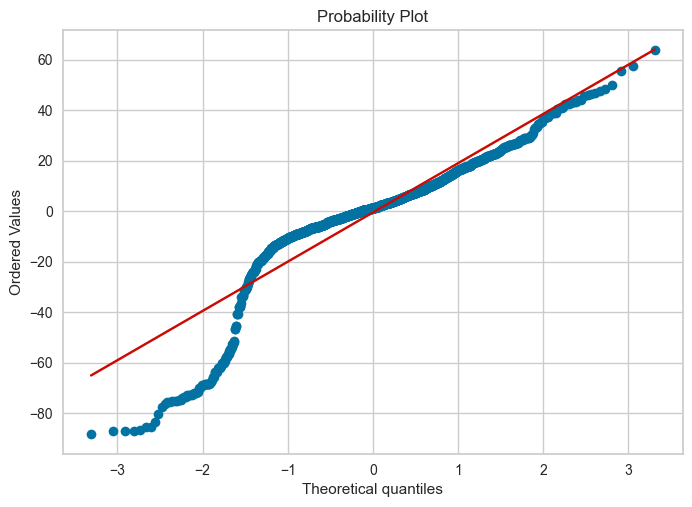

In [142]:
import scipy.stats as stats

stats.probplot(residuals, dist ="norm", plot =plt);

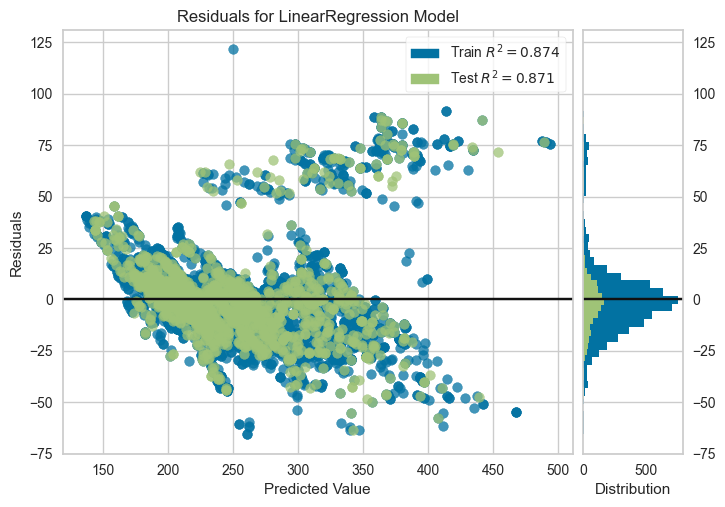

In [143]:
from yellowbrick.regressor import ResidualsPlot


model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();  

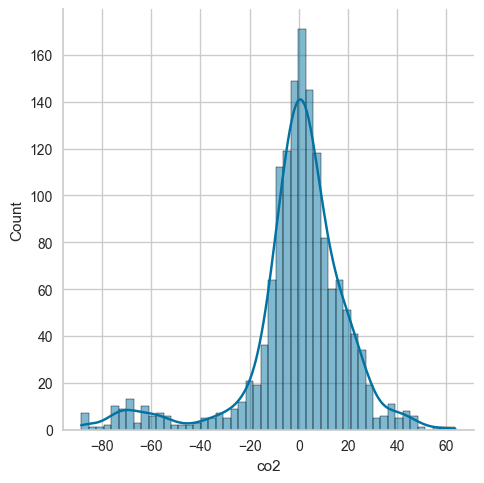

In [144]:
sns.displot((y_test-y_pred), bins=50, kde=True);

## Prediction Error for LinearRegression

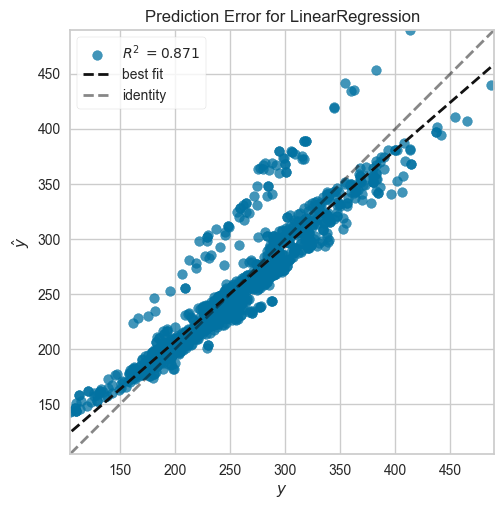

In [145]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show();

# Final Model and Predictions

In [146]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [147]:
final_model.coef_

array([12.83782801,  2.97503146,  0.83187809,  9.4575278 ])

In [148]:
final_model.intercept_

61.34157366916216

In [149]:
X.loc[[1980, 2023, 5432]]

engine_size  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb
1980          4.0            16.0           12.3            14.4
2023          2.7            10.7            7.4             9.2
5432          1.8            10.8            7.6             9.3

In [150]:
new_data = [[4.0, 16.0, 12.3, 14.4], [2.7, 10.7, 7.4, 9.2], [1.8, 10.8, 7.6, 9.3]]
new_data

[[4.0, 16.0, 12.3, 14.4], [2.7, 10.7, 7.4, 9.2], [1.8, 10.8, 7.6, 9.3]]

In [151]:
final_model.predict(new_data)

array([306.7138898 , 221.00169948, 210.85728582])

In [152]:
df.loc[[1980, 2023, 5432]]

make                    model          vehicle_class  engine_size  \
1980      NISSAN               XTERRA 4WD            SUV - SMALL          4.0   
2023     PORSCHE                   CAYMAN             TWO-SEATER          2.7   
5432  VOLKSWAGEN  GOLF SPORTWAGEN 4MOTION  STATION WAGON - SMALL          1.8   

      cylinders transmission fuel_type  fuel_cons_city  fuel_cons_hwy  \
1980          6           M6         X            16.0           12.3   
2023          6          AM7         Z            10.7            7.4   
5432          4           M6         X            10.8            7.6   

      fuel_cons_comb  fuel_cons_comb_mpg  co2  
1980            14.4                  20  331  
2023             9.2                  31  212  
5432             9.3                  30  218

In [153]:
print("Residual for 1980:", 331 - 306.7138898)

Residual for 1980: 24.286110199999996


In [154]:
print("Residual for 2023:", 212 - 221.00169948)

Residual for 2023: -9.001699480000013


In [155]:
print("Residual for 5432:", 218 - 210.85728582)

Residual for 5432: 7.142714180000013


# Regularization

In [156]:
df_new = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb','co2']]
df_new.head()

engine_size  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  co2
0          2.0             9.9            6.7             8.5  196
1          2.4            11.2            7.7             9.6  221
2          1.5             6.0            5.8             5.9  136
3          3.5            12.7            9.1            11.1  255
4          3.5            12.1            8.7            10.6  244

In [157]:
X = df_new[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']] 
y = df_new['co2'] 

## Polynomial Conversion

In [158]:
from sklearn.preprocessing import PolynomialFeatures

In [159]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [160]:
poly_features = polynomial_converter.fit_transform(X)

In [161]:
poly_features.shape

(7385, 34)

In [162]:
feature_names = polynomial_converter.get_feature_names_out(X.columns)
feature_names

array(['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb',
       'engine_size^2', 'engine_size fuel_cons_city',
       'engine_size fuel_cons_hwy', 'engine_size fuel_cons_comb',
       'fuel_cons_city^2', 'fuel_cons_city fuel_cons_hwy',
       'fuel_cons_city fuel_cons_comb', 'fuel_cons_hwy^2',
       'fuel_cons_hwy fuel_cons_comb', 'fuel_cons_comb^2',
       'engine_size^3', 'engine_size^2 fuel_cons_city',
       'engine_size^2 fuel_cons_hwy', 'engine_size^2 fuel_cons_comb',
       'engine_size fuel_cons_city^2',
       'engine_size fuel_cons_city fuel_cons_hwy',
       'engine_size fuel_cons_city fuel_cons_comb',
       'engine_size fuel_cons_hwy^2',
       'engine_size fuel_cons_hwy fuel_cons_comb',
       'engine_size fuel_cons_comb^2', 'fuel_cons_city^3',
       'fuel_cons_city^2 fuel_cons_hwy',
       'fuel_cons_city^2 fuel_cons_comb',
       'fuel_cons_city fuel_cons_hwy^2',
       'fuel_cons_city fuel_cons_hwy fuel_cons_comb',
       'fuel_cons_city fuel_cons_c

In [163]:
poly_df = pd.DataFrame(poly_features, columns=feature_names)
poly_df.head()

engine_size  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  engine_size^2  \
0          2.0             9.9            6.7             8.5           4.00   
1          2.4            11.2            7.7             9.6           5.76   
2          1.5             6.0            5.8             5.9           2.25   
3          3.5            12.7            9.1            11.1          12.25   
4          3.5            12.1            8.7            10.6          12.25   

   engine_size fuel_cons_city  engine_size fuel_cons_hwy  \
0                       19.80                      13.40   
1                       26.88                      18.48   
2                        9.00                       8.70   
3                       44.45                      31.85   
4                       42.35                      30.45   

   engine_size fuel_cons_comb  fuel_cons_city^2  fuel_cons_city fuel_cons_hwy  \
0                       17.00             98.01                         66.33   
1                       23.04            125.44                         86.24   
2                        8.85             36.00                         34.80   
3                       38.85            161.29                        115.57   
4                       37.10            146.41                        105.27   

   ...  fuel_cons_city^3  fuel_cons_city^2 fuel_cons_hwy  \
0  ...           970.299                         656.667   
1  ...          1404.928                         965.888   
2  ...           216.000                         208.800   
3  ...          2048.383                        1467.739   
4  ...          1771.561                        1273.767   

   fuel_cons_city^2 fuel_cons_comb  fuel_cons_city fuel_cons_hwy^2  \
0                          833.085                         444.411   
1                         1204.224                         664.048   
2                          212.400                         201.840   
3                         1790.319                        1051.687   
4                         1551.946                         915.849   

   fuel_cons_city fuel_cons_hwy fuel_cons_comb  \
0                                      563.805   
1                                      827.904   
2                                      205.320   
3                                     1282.827   
4                                     1115.862   

   fuel_cons_city fuel_cons_comb^2  fuel_cons_hwy^3  \
0                          715.275          300.763   
1                         1032.192          456.533   
2                          208.860          195.112   
3                         1564.767          753.571   
4                         1359.556          658.503   

   fuel_cons_hwy^2 fuel_cons_comb  fuel_cons_hwy fuel_cons_comb^2  \
0                         381.565                         484.075   
1                         569.184                         709.632   
2                         198.476                         201.898   
3                         919.191                        1121.211   
4                         802.314                         977.532   

   fuel_cons_comb^3  
0           614.125  
1           884.736  
2           205.379  
3          1367.631  
4          1191.016  

[5 rows x 34 columns]

In [164]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.9 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.9 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
poly_df.corr().style.applymap(color_correlation2)

limit_output extension: Maximum message size of 10000 exceeded with 117780 characters

## Spliting Train and Test data

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

**Scaling**

In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
scaler = StandardScaler()

In [169]:
scaler.fit(X_train)

StandardScaler()

In [170]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.12149345, -0.33509065, -0.42937884, ..., -0.44277601,
        -0.43865542, -0.43407791],
       [ 0.6141664 ,  0.6072775 ,  0.56440556, ...,  0.27316779,
         0.28060993,  0.28236933],
       [-0.12149345,  0.350268  , -0.02283068, ..., -0.13686415,
        -0.07535264, -0.01453438],
       ...,
       [ 0.24633648, -0.24942082, -0.11317471, ..., -0.28288794,
        -0.30770012, -0.33136081],
       [-0.48932338, -0.87766626, -0.74558297, ..., -0.62602189,
        -0.64312057, -0.65620112],
       [ 0.6141664 ,  0.23604156,  0.47406152, ...,  0.13627536,
         0.08903989,  0.04098662]])

In [171]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.12149345, -0.04952455, -0.02283068, ..., -0.20334866,
        -0.21028238, -0.21827663],
       [ 0.90843035,  1.34974937,  1.1516418 , ...,  0.92025191,
         0.98159194,  1.03208158],
       [ 2.23261809,  1.00707004,  1.06129776, ...,  0.75753722,
         0.75584335,  0.74464581],
       ...,
       [-1.29854922, -1.07756253, -1.10695912, ..., -0.76059968,
        -0.76398682, -0.76352958],
       [ 0.24633648, -0.1923076 , -0.38420683, ..., -0.40552314,
        -0.38952697, -0.37366379],
       [-0.85715331, -0.84910965, -1.10695912, ..., -0.74272273,
        -0.72896082, -0.71248104]])

# Ridge Regression

In [172]:
from sklearn.linear_model import Ridge

In [173]:
ridge_model = Ridge(alpha=1)

In [174]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [175]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [176]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

ridge_train  ridge_test
R2       0.926719    0.917257
mae      8.914558    9.415102
mse    250.513190  284.606296
rmse    15.827608   16.870278

## CV with alpha: 1

In [177]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

In [178]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                0.925256
train_r2                               0.926636
test_neg_mean_absolute_error          -8.947699
train_neg_mean_absolute_error         -8.902760
test_neg_mean_squared_error         -254.402674
train_neg_mean_squared_error        -250.785164
test_neg_root_mean_squared_error     -15.918423
train_neg_root_mean_squared_error    -15.835802
dtype: float64

In [179]:
ridge_score = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
ridge_score

ridge_train  ridge_test
R2       0.926719    0.917257
mae      8.914558    9.415102
mse    250.513190  284.606296
rmse    15.827608   16.870278

In [180]:
rm = Ridge(alpha=1).fit(X_train_scaled, y_train)
rm.coef_

array([  0.82381597,  67.7669353 ,  34.53515494,  77.4367517 ,
       -53.06088139,  10.42246313,  16.11640788,  17.80472641,
       -45.97827772, -62.29895609, -46.27943882,   2.34804311,
       -32.78701134, -35.21330082, -27.95301964,  29.68011828,
        24.01959212,  28.59039449,  28.7116039 , -21.92013604,
        11.08596702,  -0.21356853, -13.53680844,   3.00060281,
        57.54622988, -35.43011324,  23.85471328, -28.45207627,
       -33.3223328 ,   3.18435919,  69.55277168,   7.34076241,
       -18.537783  ,  -4.43100497])

In [181]:
rm_df = pd.DataFrame(ridge_model.coef_,  columns = ["ridge_coef_1"])
rm_df

ridge_coef_1
0       0.823816
1      67.766935
2      34.535155
3      77.436752
4     -53.060881
5      10.422463
6      16.116408
7      17.804726
8     -45.978278
9     -62.298956
10    -46.279439
11      2.348043
12    -32.787011
13    -35.213301
14    -27.953020
15     29.680118
16     24.019592
17     28.590394
18     28.711604
19    -21.920136
20     11.085967
21     -0.213569
22    -13.536808
23      3.000603
24     57.546230
25    -35.430113
26     23.854713
27    -28.452076
28    -33.322333
29      3.184359
30     69.552772
31      7.340762
32    -18.537783
33     -4.431005

## For best alpha

In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [184]:
ridge_model = Ridge()

In [185]:
param_grid = {"alpha":alpha_space}

In [186]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)


In [187]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alp

limit_output extension: Maximum message size of 10000 exceeded with 13430 characters

In [188]:
grid_ridge.best_params_

{'alpha': 0.01}

In [189]:
grid_ridge.best_index_

0

In [190]:
pd.DataFrame(grid_ridge.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]


mean_test_score    -15.686995
mean_train_score   -15.561125
Name: 0, dtype: object

In [191]:
grid_ridge.best_score_

-15.68699471111862

In [192]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [193]:
rg_score = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rg_score

grid_ridge_train  grid_ridge_test
R2            0.929119         0.919864
mae           9.198850         9.640445
mse         242.308948       275.637629
rmse         15.566276        16.602338

In [194]:
pd.concat([ridge_score, rg_score], axis=1)

ridge_train  ridge_test  grid_ridge_train  grid_ridge_test
R2       0.926719    0.917257          0.929119         0.919864
mae      8.914558    9.415102          9.198850         9.640445
mse    250.513190  284.606296        242.308948       275.637629
rmse    15.827608   16.870278         15.566276        16.602338

In [195]:
rgm = Ridge(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rgm.coef_

array([ -10.31549021,   79.96780367,   49.02130291,   56.46481276,
       -129.72758517,   99.55723509,  -26.90588773,  124.3556044 ,
       -317.48967013,  146.55747406,  -73.87653149, -214.53831121,
         65.9149006 ,   92.65670228,  -65.1496066 ,  149.83388494,
         29.82288637,   94.07611422, -190.12117818,  102.17533588,
       -103.79953037,  -35.29536321,   18.06370631,  -60.4550823 ,
        383.90364563, -212.67683637,  137.16184858,   -7.66608028,
       -195.9451499 ,    3.47402448,  256.53212541,   12.14254161,
       -155.80728328,  -47.18646079])

In [196]:
rgm_df = pd.DataFrame(rgm.coef_,  columns = ["ridge_coef_0.01"])
rgm_df

ridge_coef_0.01
0        -10.315490
1         79.967804
2         49.021303
3         56.464813
4       -129.727585
5         99.557235
6        -26.905888
7        124.355604
8       -317.489670
9        146.557474
10       -73.876531
11      -214.538311
12        65.914901
13        92.656702
14       -65.149607
15       149.833885
16        29.822886
17        94.076114
18      -190.121178
19       102.175336
20      -103.799530
21       -35.295363
22        18.063706
23       -60.455082
24       383.903646
25      -212.676836
26       137.161849
27        -7.666080
28      -195.945150
29         3.474024
30       256.532125
31        12.142542
32      -155.807283
33       -47.186461

In [197]:
pd.concat([rm_df, rgm_df], axis = 1)

ridge_coef_1  ridge_coef_0.01
0       0.823816       -10.315490
1      67.766935        79.967804
2      34.535155        49.021303
3      77.436752        56.464813
4     -53.060881      -129.727585
5      10.422463        99.557235
6      16.116408       -26.905888
7      17.804726       124.355604
8     -45.978278      -317.489670
9     -62.298956       146.557474
10    -46.279439       -73.876531
11      2.348043      -214.538311
12    -32.787011        65.914901
13    -35.213301        92.656702
14    -27.953020       -65.149607
15     29.680118       149.833885
16     24.019592        29.822886
17     28.590394        94.076114
18     28.711604      -190.121178
19    -21.920136       102.175336
20     11.085967      -103.799530
21     -0.213569       -35.295363
22    -13.536808        18.063706
23      3.000603       -60.455082
24     57.546230       383.903646
25    -35.430113      -212.676836
26     23.854713       137.161849
27    -28.452076        -7.666080
28    -33.322333      -195.945150
29      3.184359         3.474024
30     69.552772       256.532125
31      7.340762        12.142542
32    -18.537783      -155.807283
33     -4.431005       -47.186461

# Lasso Regression

In [198]:
from sklearn.linear_model import Lasso

In [199]:
lasso_model = Lasso(alpha=1)

In [200]:
lasso_model = lasso_model.fit(X_train_scaled, y_train)

In [201]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [202]:
ls_score = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
ls_score

lasso_train  lasso_test
R2       0.891682    0.888501
mae     12.014818   12.131576
mse    370.290477  383.515082
rmse    19.242933   19.583541

In [203]:
pd.concat([ridge_score, rg_score, ls_score], axis=1)

ridge_train  ridge_test  grid_ridge_train  grid_ridge_test  lasso_train  \
R2       0.926719    0.917257          0.929119         0.919864     0.891682   
mae      8.914558    9.415102          9.198850         9.640445    12.014818   
mse    250.513190  284.606296        242.308948       275.637629   370.290477   
rmse    15.827608   16.870278         15.566276        16.602338    19.242933   

      lasso_test  
R2      0.888501  
mae    12.131576  
mse   383.515082  
rmse   19.583541

In [204]:
lasso_model.coef_

array([ 13.0037719 ,  20.53948344,  14.00935228,  17.36349118,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   2.18463088,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        , -11.89677286,
        -0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ])

In [205]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [206]:
pd.concat([rm_df, rgm_df, lsm_df], axis = 1)

ridge_coef_1  ridge_coef_0.01  lasso_coef_1
0       0.823816       -10.315490     13.003772
1      67.766935        79.967804     20.539483
2      34.535155        49.021303     14.009352
3      77.436752        56.464813     17.363491
4     -53.060881      -129.727585      0.000000
5      10.422463        99.557235      0.000000
6      16.116408       -26.905888      0.000000
7      17.804726       124.355604      0.000000
8     -45.978278      -317.489670     -0.000000
9     -62.298956       146.557474     -0.000000
10    -46.279439       -73.876531     -0.000000
11      2.348043      -214.538311     -0.000000
12    -32.787011        65.914901     -0.000000
13    -35.213301        92.656702     -0.000000
14    -27.953020       -65.149607      2.184631
15     29.680118       149.833885      0.000000
16     24.019592        29.822886      0.000000
17     28.590394        94.076114      0.000000
18     28.711604      -190.121178      0.000000
19    -21.920136       102.175336      0.000000
20     11.085967      -103.799530      0.000000
21     -0.213569       -35.295363      0.000000
22    -13.536808        18.063706      0.000000
23      3.000603       -60.455082      0.000000
24     57.546230       383.903646     -0.000000
25    -35.430113      -212.676836     -0.000000
26     23.854713       137.161849     -0.000000
27    -28.452076        -7.666080    -11.896773
28    -33.322333      -195.945150     -0.000000
29      3.184359         3.474024     -0.000000
30     69.552772       256.532125     -0.000000
31      7.340762        12.142542     -0.000000
32    -18.537783      -155.807283     -0.000000
33     -4.431005       -47.186461     -0.000000

## best alpha

In [207]:
lasso_model = Lasso()

In [208]:
param_grid = {"alpha":alpha_space}

In [209]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)


In [210]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END ...................

limit_output extension: Maximum message size of 10000 exceeded with 10109 characters

In [211]:
grid_lasso.best_params_

{'alpha': 0.01}

In [212]:
grid_lasso.best_index_

0

In [213]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]


mean_test_score    -16.564789
mean_train_score   -16.469906
Name: 0, dtype: object

In [214]:
grid_lasso.best_score_

-16.564789175479227

In [215]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

array([ 3.99108429e+01,  7.80819055e+01,  1.94913204e+01,  5.80484323e+00,
       -1.06904012e+02, -6.54274146e-02,  8.70140657e+00,  8.63147364e-01,
       -6.86075792e+01, -6.69496055e+00, -0.00000000e+00,  1.53460472e+01,
       -0.00000000e+00, -1.56141657e+00,  1.53700262e+00,  7.70864310e+01,
        5.05473391e+00,  0.00000000e+00,  2.95933012e+01, -2.62126028e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.01253330e+00, -4.24245539e+01,  8.19182625e+00, -1.60048323e+01,
       -0.00000000e+00,  5.44727293e+00,  9.86259909e+00, -4.28200077e+00,
       -4.80766373e+00, -0.00000000e+00])

In [216]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.01"])

In [217]:
pd.concat([rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

ridge_coef_1  ridge_coef_0.01  lasso_coef_1  lasso_coef_0.01
0       0.823816       -10.315490     13.003772        39.910843
1      67.766935        79.967804     20.539483        78.081906
2      34.535155        49.021303     14.009352        19.491320
3      77.436752        56.464813     17.363491         5.804843
4     -53.060881      -129.727585      0.000000      -106.904012
5      10.422463        99.557235      0.000000        -0.065427
6      16.116408       -26.905888      0.000000         8.701407
7      17.804726       124.355604      0.000000         0.863147
8     -45.978278      -317.489670     -0.000000       -68.607579
9     -62.298956       146.557474     -0.000000        -6.694961
10    -46.279439       -73.876531     -0.000000        -0.000000
11      2.348043      -214.538311     -0.000000        15.346047
12    -32.787011        65.914901     -0.000000        -0.000000
13    -35.213301        92.656702     -0.000000        -1.561417
14    -27.953020       -65.149607      2.184631         1.537003
15     29.680118       149.833885      0.000000        77.086431
16     24.019592        29.822886      0.000000         5.054734
17     28.590394        94.076114      0.000000         0.000000
18     28.711604      -190.121178      0.000000        29.593301
19    -21.920136       102.175336      0.000000        -2.621260
20     11.085967      -103.799530      0.000000         0.000000
21     -0.213569       -35.295363      0.000000        -0.000000
22    -13.536808        18.063706      0.000000        -0.000000
23      3.000603       -60.455082      0.000000        -0.000000
24     57.546230       383.903646     -0.000000         1.012533
25    -35.430113      -212.676836     -0.000000       -42.424554
26     23.854713       137.161849     -0.000000         8.191826
27    -28.452076        -7.666080    -11.896773       -16.004832
28    -33.322333      -195.945150     -0.000000        -0.000000
29      3.184359         3.474024     -0.000000         5.447273
30     69.552772       256.532125     -0.000000         9.862599
31      7.340762        12.142542     -0.000000        -4.282001
32    -18.537783      -155.807283     -0.000000        -4.807664
33     -4.431005       -47.186461     -0.000000        -0.000000

In [218]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [219]:
lg_score = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lg_score

grid_lasso_train  grid_lasso_test
R2            0.920592         0.913835
mae           8.989943         9.306118
mse         271.460814       296.376177
rmse         16.476068        17.215579

In [220]:
pd.concat([ridge_score, rg_score, ls_score, lg_score], axis=1)

ridge_train  ridge_test  grid_ridge_train  grid_ridge_test  lasso_train  \
R2       0.926719    0.917257          0.929119         0.919864     0.891682   
mae      8.914558    9.415102          9.198850         9.640445    12.014818   
mse    250.513190  284.606296        242.308948       275.637629   370.290477   
rmse    15.827608   16.870278         15.566276        16.602338    19.242933   

      lasso_test  grid_lasso_train  grid_lasso_test  
R2      0.888501          0.920592         0.913835  
mae    12.131576          8.989943         9.306118  
mse   383.515082        271.460814       296.376177  
rmse   19.583541         16.476068        17.215579

# Feature importances with Ridge

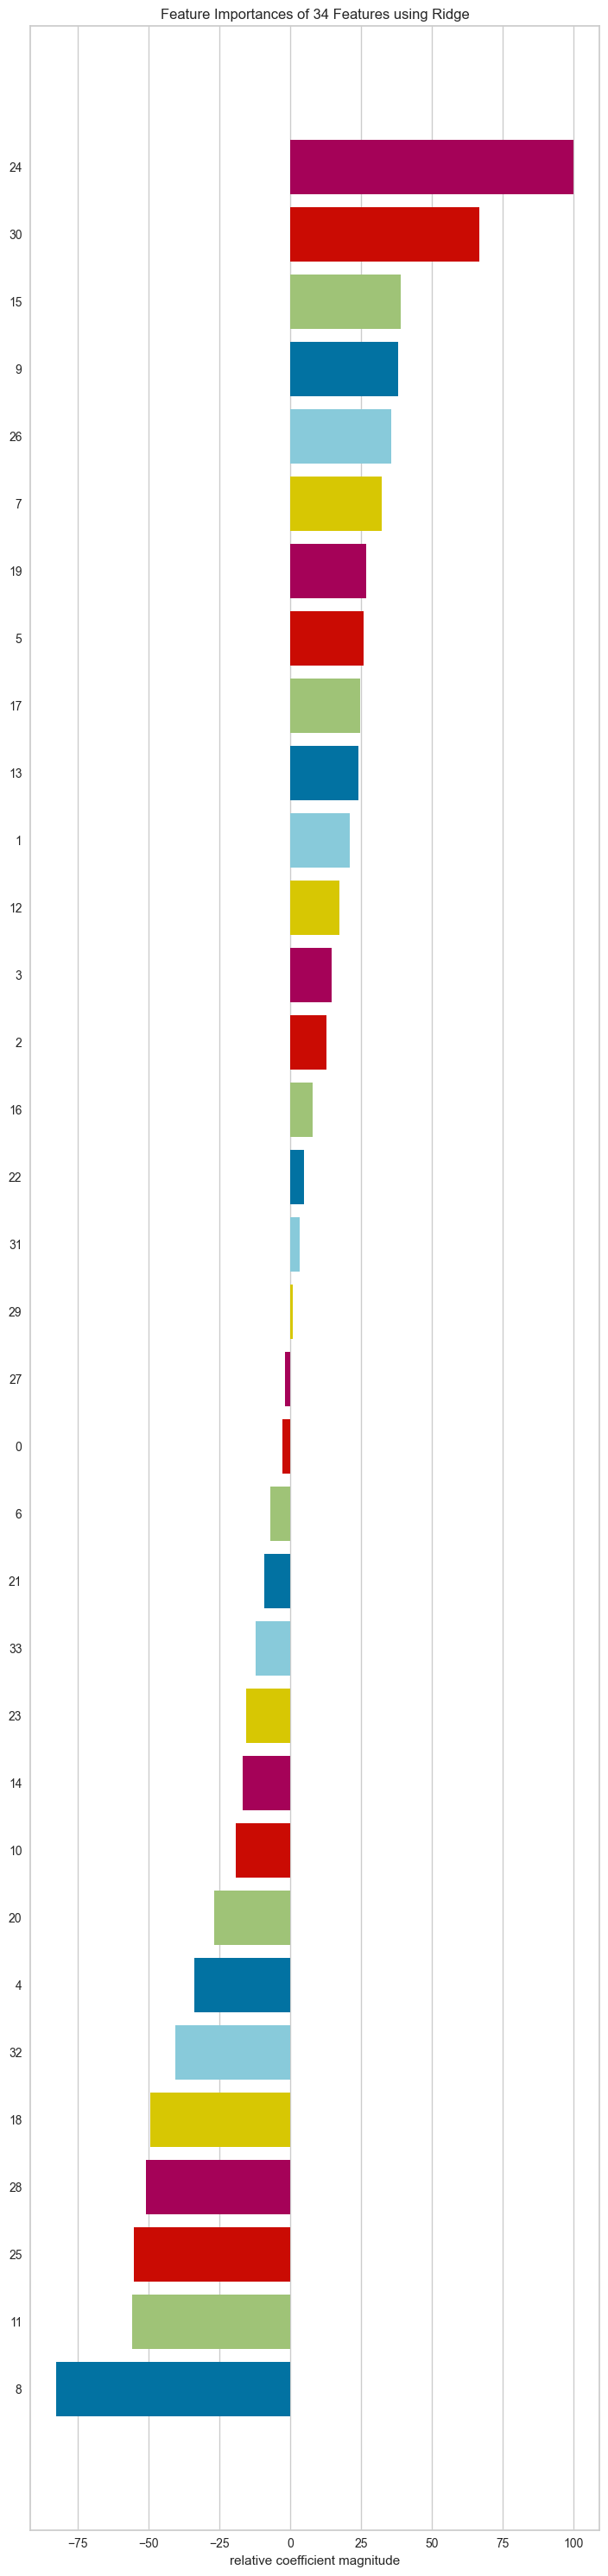

In [221]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# Feature importances with Lasso

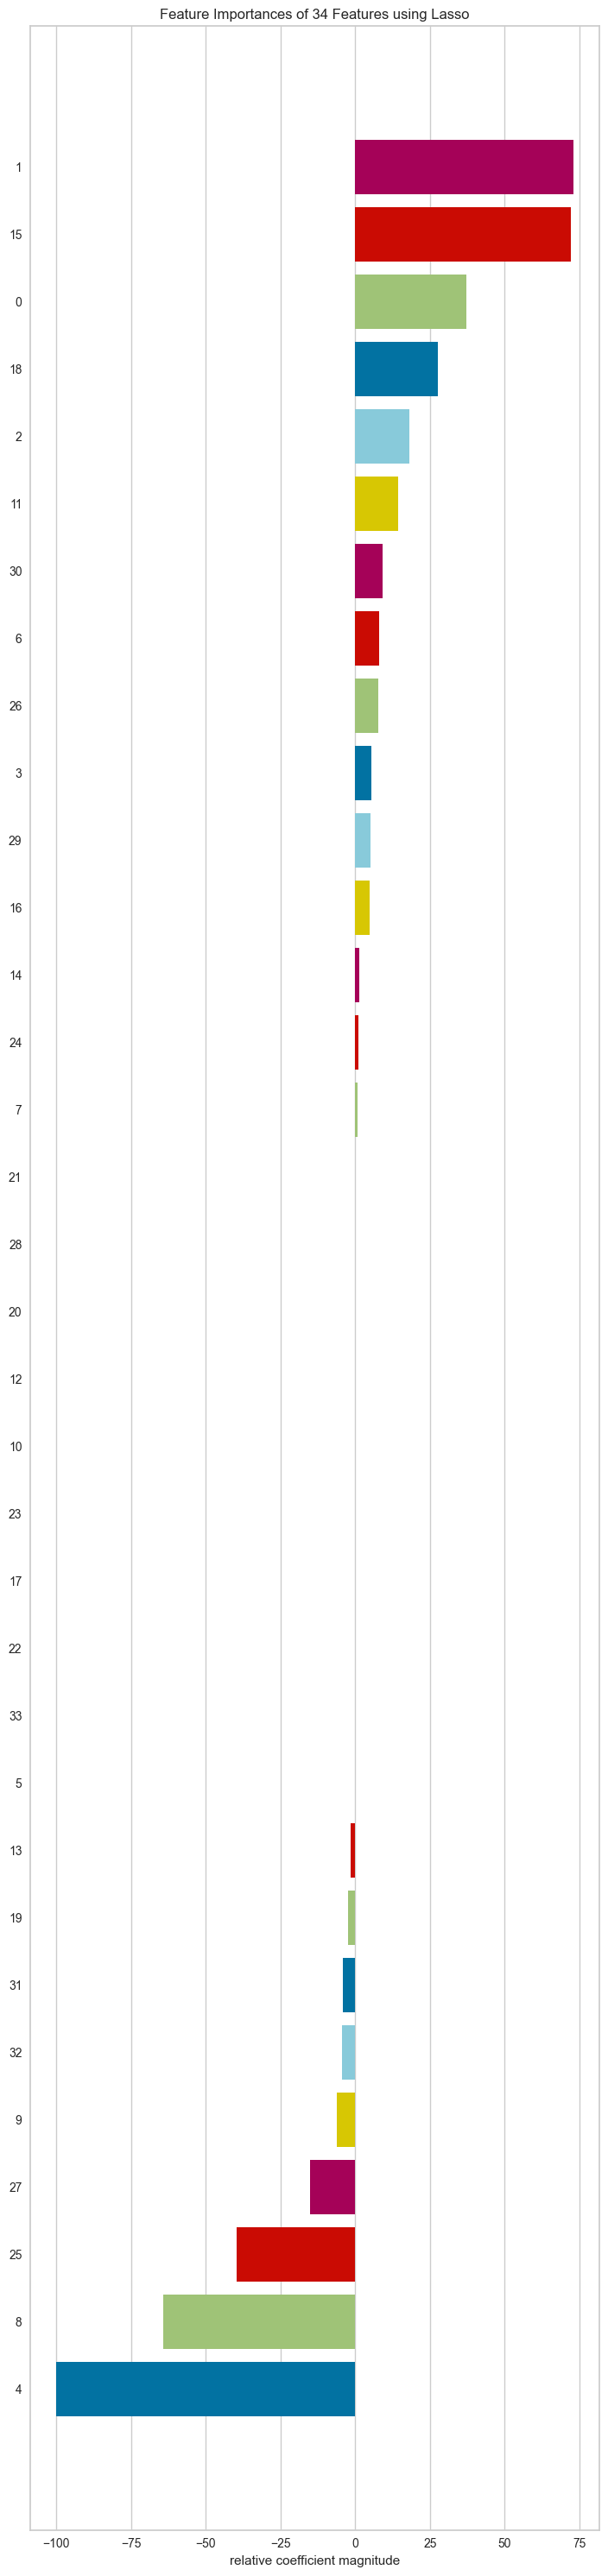

In [222]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# Final Model and Prediction

In [223]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [224]:
final_model = Lasso(alpha=0.01)

In [225]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

In [226]:
final_model.coef_

array([  38.75103316,   76.62765367,   19.36586111,    5.93374592,
       -106.3890685 ,    3.29281296,    9.91173023,    0.29756602,
        -67.27234182,   -6.75560859,   -0.        ,   15.50049147,
         -0.        ,   -1.54866062,    2.95324767,   74.01142529,
          3.99836305,    0.        ,   29.86002386,   -3.01026302,
          0.        ,   -0.        ,   -0.        ,   -0.        ,
          0.738538  ,  -43.36097366,    8.59113475,  -15.85593205,
         -0.        ,    5.15131238,   10.60844153,   -4.40312458,
         -5.05744095,   -0.        ])

In [227]:
final_model.intercept_

250.5846987136092

In [228]:
df.loc[[444]]

make                  model    vehicle_class  engine_size  cylinders  \
444  GMC  SAVANA 1500 PASSENGER  VAN - PASSENGER          5.3          8   

    transmission fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
444           A4         E            23.9           18.5            21.5   

     fuel_cons_comb_mpg  co2  
444                  13  344

In [229]:
new_data = [[5.3, 23.9, 18.5, 21.5]]
new_data

[[5.3, 23.9, 18.5, 21.5]]

In [230]:
poly_sample = polynomial_converter.transform(new_data)
poly_sample

array([[5.3000000e+00, 2.3900000e+01, 1.8500000e+01, 2.1500000e+01,
        2.8090000e+01, 1.2667000e+02, 9.8050000e+01, 1.1395000e+02,
        5.7121000e+02, 4.4215000e+02, 5.1385000e+02, 3.4225000e+02,
        3.9775000e+02, 4.6225000e+02, 1.4887700e+02, 6.7135100e+02,
        5.1966500e+02, 6.0393500e+02, 3.0274130e+03, 2.3433950e+03,
        2.7234050e+03, 1.8139250e+03, 2.1080750e+03, 2.4499250e+03,
        1.3651919e+04, 1.0567385e+04, 1.2281015e+04, 8.1797750e+03,
        9.5062250e+03, 1.1047775e+04, 6.3316250e+03, 7.3583750e+03,
        8.5516250e+03, 9.9383750e+03]])

In [231]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

array([[1.58036028, 3.24095608, 4.25224534, 3.63893471, 1.58854922,
        2.7481773 , 3.34941674, 2.97274147, 4.02359436, 4.80143162,
        4.32001849, 5.51720871, 5.08701847, 4.61651544, 1.47984257,
        2.47836542, 2.9868052 , 2.66616768, 3.65759765, 4.32874517,
        3.90819891, 4.99815438, 4.58423407, 4.16246325, 4.68702844,
        5.44008109, 4.97240169, 6.16673659, 5.72201509, 5.25870668,
        6.82558699, 6.42970251, 5.99917472, 5.54388873]])

In [232]:
final_model.predict(scaled_sample)

array([362.78364865])

In [233]:
print("(Actual value:)344 - (Predicted value:)362.78364865 =", (344) - (362.78364865))

(Actual value:)344 - (Predicted value:)362.78364865 = -18.783648649999975


In [234]:
pd.DataFrame(X_train)

# data scallendingten sonra arraye dönüşür. Eğer scallenmiş datanızı df'e dönüştürmek istiyorsanız. Burdaki işlemi 
# yapmalısınız.

0     1     2     3      4      5      6      7       8       9   ...  \
0     3.0  11.4   8.1   9.9   9.00  34.20  24.30  29.70  129.96   92.34  ...   
1     4.0  14.7  10.3  12.7  16.00  58.80  41.20  50.80  216.09  151.41  ...   
2     3.0  13.8   9.0  11.7   9.00  41.40  27.00  35.10  190.44  124.20  ...   
3     3.4  11.3   7.9   9.8  11.56  38.42  26.86  33.32  127.69   89.27  ...   
4     2.0  10.1   7.0   8.7   4.00  20.20  14.00  17.40  102.01   70.70  ...   
...   ...   ...   ...   ...    ...    ...    ...    ...     ...     ...  ...   
5903  2.0  10.3   7.4   9.0   4.00  20.60  14.80  18.00  106.09   76.22  ...   
5904  3.5  10.6   7.3   9.1  12.25  37.10  25.55  31.85  112.36   77.38  ...   
5905  3.5  11.7   8.8  10.4  12.25  40.95  30.80  36.40  136.89  102.96  ...   
5906  2.5   9.5   7.4   8.6   6.25  23.75  18.50  21.50   90.25   70.30  ...   
5907  4.0  13.4  10.1  11.9  16.00  53.60  40.40  47.60  179.56  135.34  ...   

            24        25        26        27        28        29        30  \
0     1481.544  1052.676  1286.604   747.954   914.166  1117.314   531.441   
1     3176.523  2225.727  2744.343  1559.523  1922.907  2370.963  1092.727   
2     2628.072  1713.960  2228.148  1117.800  1453.140  1889.082   729.000   
3     1442.897  1008.751  1251.362   705.233   874.846  1085.252   493.039   
4     1030.301   714.070   887.487   494.900   615.090   764.469   343.000   
...        ...       ...       ...       ...       ...       ...       ...   
5903  1092.727   785.066   954.810   564.028   685.980   834.300   405.224   
5904  1191.016   820.228  1022.476   564.874   704.158   877.786   389.017   
5905  1601.613  1204.632  1423.656   906.048  1070.784  1265.472   681.472   
5906   857.375   667.850   776.150   520.220   604.580   702.620   405.224   
5907  2406.104  1813.556  2136.764  1366.934  1610.546  1897.574  1030.301   

            31        32        33  
0      649.539   793.881   970.299  
1     1347.343  1661.287  2048.383  
2      947.700  1232.010  1601.613  
3      611.618   758.716   941.192  
4      426.300   529.830   658.503  
...        ...       ...       ...  
5903   492.840   599.400   729.000  
5904   484.939   604.513   753.571  
5905   805.376   951.808  1124.864  
5906   470.936   547.304   636.056  
5907  1213.919  1430.261  1685.159  

[5908 rows x 34 columns]